## Loading of Stringer orientations data

includes some visualizations

In [1]:
from matplotlib import rcParams 
from matplotlib import pyplot as plt
import numpy as np
import os, requests
from scipy.stats import zscore
from sklearn.decomposition import PCA 
# from umap import UMAP
# from mpl_toolkits import mplot3d



In [2]:
#@title Data retrieval

fname = "stringer_orientations.npy"
url = "https://osf.io/ny4ut/download"

if not os.path.isfile(fname):
  print('you dont have the data')

  try:
    r = requests.get(url)
    print('success downloading')
  except requests.ConnectionError:
    print("!!! Failed to download data !!!")
  else:
    if r.status_code != requests.codes.ok:
      print("!!! Failed to download data !!!")
    else:
      with open(fname, "wb") as fid:
        fid.write(r.content)

dat has fields:
* `dat['sresp']`: neurons by stimuli, a.k.a. the neural response data (23589 by 4598)
* `dat['xyz']`: three-dimensional position of each neuron in the brain. 
* `dat['run']`: 1 by stimuli, a.k.a. the running speed of the animal in a.u.
* `dat['istim']`: 1 by stimuli, goes from 0 to 2*np.pi, the orientations shown on each trial
* `dat['u_spont']`: neurons by 128, the weights for the top 128 principal components of spontaneous activity. Unit norm.
* `dat['v_spont']`: 128 by 910, the timecourses for the top 128 PCs of spont activity.
* `dat['u_spont'] @ dat['v_spont']`: a reconstruction of the spontaneous activity for 910 timepoints interspersed throughout the recording.
* `dat['stat']`: 1 by neurons, some statistics for each neuron, see Suite2p for full documentation.


In [246]:
## Compute PCs and UMAP embedding 

dat= np.load(fname,allow_pickle=True).item()
Z = zscore(dat['sresp'], axis=1)
X_non_Z = PCA(n_components = 200).fit_transform(dat['sresp'].T)
X_Z = PCA(n_components = 200).fit_transform(Z.T)

ncomp = 3 # try 2, then try 3
xinit =  zscore(X[:,:ncomp], axis=0)

embed_non_Z = UMAP(n_components=ncomp, init = xinit, n_neighbors = 30, 
             metric = 'correlation', transform_seed = 42).fit_transform(X_non_Z)

embed_Z = UMAP(n_components=ncomp, init = xinit, n_neighbors = 30, 
             metric = 'correlation', transform_seed = 42).fit_transform(X_Z)
     

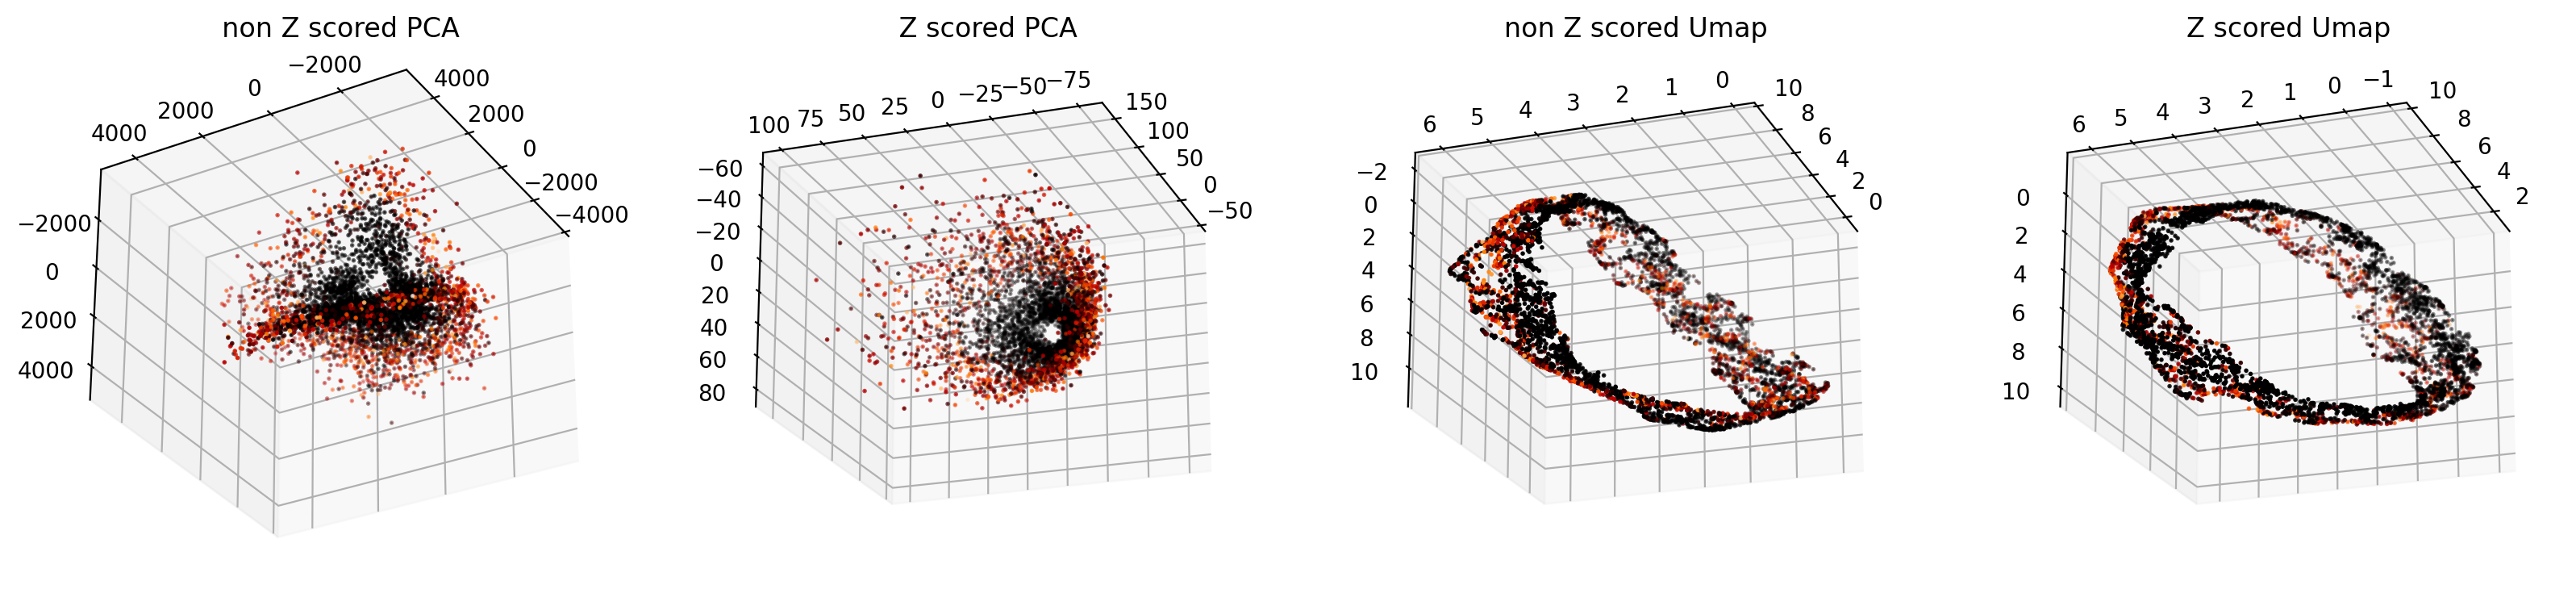

In [290]:



binned_loco=(dat['run'])

# set up a figure 4 times as wide as it is tall
fig = plt.figure(figsize=(20,5), dpi=200)

# =============
# First subplot
# =============
# set up the axes for the first plot
ax1 = fig.add_subplot(1, 4, 4, projection='3d')
ax1.scatter3D(embed_Z[:,0], embed_Z[:,1], embed_Z[:,2], s  = 1, c=binned_loco,  cmap = 'gist_heat') #(dat['run']<5)*0.2  +(dat['run']>10)*1,
# fig.colorbar(p, ax=axs)
ax1.view_init(160, 160)
ax1.set_title('Z scored Umap')
# fig.colorbar(p, shrink=0.5, aspect=10)

# ==============
# Second subplot
# ==============
ax2 = fig.add_subplot(1, 4, 3, projection='3d')
ax2.scatter3D(embed_non_Z[:,0], embed_non_Z[:,1], embed_non_Z[:,2], s  = 1, c=binned_loco,  cmap = 'gist_heat') #(dat['run']<5)*0.2  +(dat['run']>10)*1,
# fig.colorbar(p, ax=axs)
ax2.view_init(160, 160)
ax2.set_title('non Z scored Umap')
# fig.colorbar(p, shrink=0.5, aspect=10)



# ==============
# Third subplot
# ==============
ax3 = fig.add_subplot(1, 4, 2, projection='3d')
ax3.scatter3D(X_Z[:,0], X_Z[:,1], X_Z[:,2], s  = 1, c=binned_loco,  cmap = 'gist_heat') #(dat['run']<5)*0.2  +(dat['run']>10)*1,
# fig.colorbar(p, ax=axs)
ax3.view_init(160, 160)
ax3.set_title(' Z scored PCA')



# ==============
# Fourth subplot
# ==============
ax4 = fig.add_subplot(1, 4, 1, projection='3d')
ax4.scatter3D(X[:,0], X[:,1], X[:,2], s  = 1, c=binned_loco,  cmap = 'gist_heat') #(dat['run']<5)*0.2  +(dat['run']>10)*1,
# fig.colorbar(p, ax=axs)
ax4.view_init(150, 150)
ax4.set_title('  non Z scored PCA')


plt.savefig('PCA_orientation.png')












# Make the movie

In [ ]:
# from mpl_toolkits.mplot3d import Axes3D
# fig, ax = plt.subplots(1,1, figsize=(3,3), dpi=200, facecolor='w', edgecolor='k',sharex=False, sharey=False)

# ax = Axes3D(fig)
# ax.scatter3D(embed[:,0], embed[:,1], embed[:,2], s  = 1, c=binned_loco,  cmap = 'gist_heat')
# for ii in range(0,360,1):
#     ax.view_init(elev=10., azim=ii)
#     plt.savefig("./figs/movie_new%d.png" % ii)
    
# You then go to the folder figs and run this in a terminal    
    
#ffmpeg -r 30 -i movie_new%d.png -c:v libx264 -vf fps=25 -pixmt yuv420p out_new.mp4



## Compute tuning differences with and wihtout locomotion

In [3]:
dat= np.load(fname,allow_pickle=True).item()

(array([456., 464., 491., 449., 436., 475., 467., 451., 467., 442.]),
 array([6.09159136e-04, 6.28788729e-01, 1.25696830e+00, 1.88514787e+00,
        2.51332744e+00, 3.14150701e+00, 3.76968658e+00, 4.39786615e+00,
        5.02604572e+00, 5.65422529e+00, 6.28240486e+00]),
 <BarContainer object of 10 artists>)

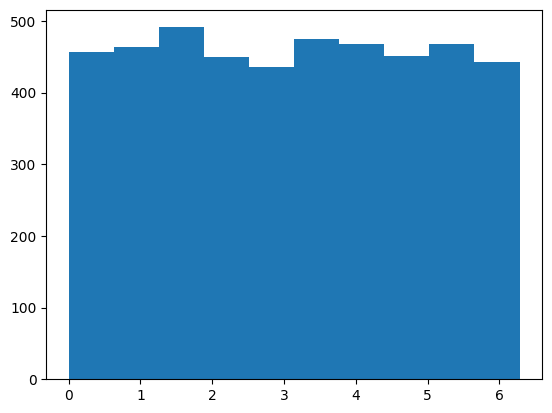

In [4]:
plt.hist(dat['istim'])

In [5]:

#######################################################
# Arrange vs orientation
dir_order=np.argsort(dat['istim'])
dat['run_ordered']=dat['run'][dir_order]
dat['istim_ordered']=dat['istim'][dir_order]
dat['sresp_ordered']=dat['sresp'][:,dir_order]

dat['istim_half']=dat['istim'].copy()
dat['istim_half'][dat['istim_half'] > np.pi]=dat['istim_half'][dat['istim_half'] > np.pi] - np.pi
ori_order=np.argsort(dat['istim_half'])
dat['run_half_ordered']=dat['run'][ori_order]
dat['istim_half_ordered']=dat['istim'][ori_order]
dat['sresp_half_ordered']=dat['sresp'][:,ori_order]

In [6]:
def calc_dc_ac_comp(A,axis=-1):
    if A.ndim > 1:
        A_xpsd = np.moveaxis(A,axis,-1)
    else:
        A_xpsd = A.copy()
    Nax = A.shape[axis]
    angs = np.arange(Nax) * 2*np.pi/Nax
    A0 = np.mean(A_xpsd,axis=-1)
    As = np.mean(A_xpsd*np.sin(angs),axis=-1)
    Ac = np.mean(A_xpsd*np.cos(angs),axis=-1)
    A1mod = np.sqrt(As**2+Ac**2)
    A1phs = np.arctan2(As,Ac)
    
    return A0,A1mod,A1phs

Text(0.5, 1.0, 'Response vs Orientation')

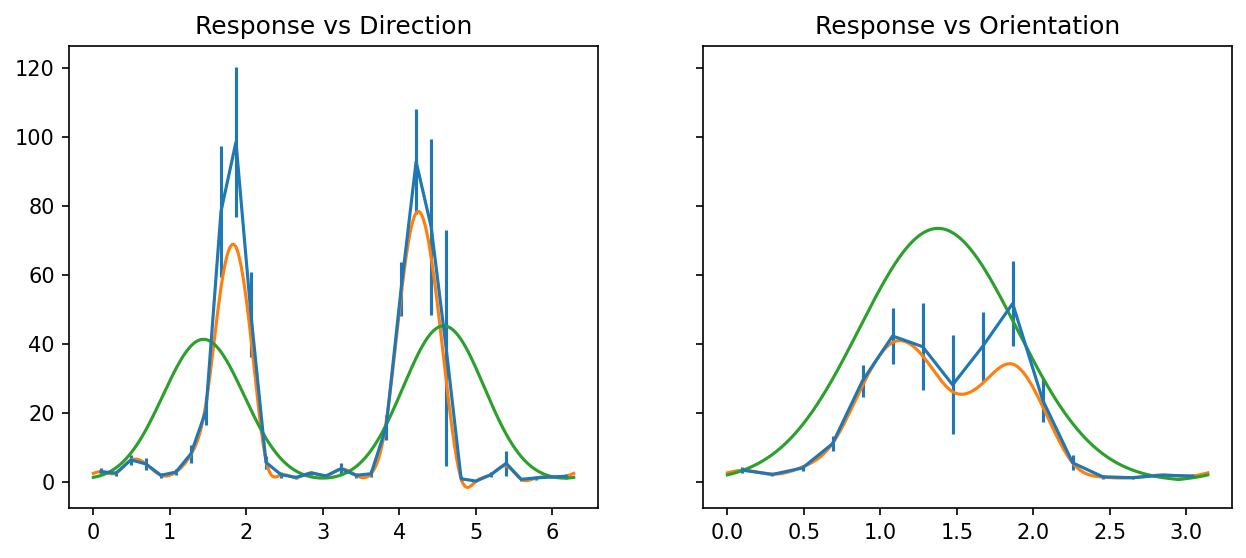

In [7]:
fig,axs=plt.subplots(1, 2, figsize=(10,4), dpi=150, sharey=True)

this_cell=122

#######################################################
# Choose the cell to analyze and choose stationary activity larger than zero 

stat_cells=dat['run_ordered']<0.01
nonzero_cells=dat['sresp_ordered'][this_cell,:]>-1
xdata=dat['istim_ordered'][stat_cells*nonzero_cells]
ydata=dat['sresp_ordered'][this_cell,stat_cells*nonzero_cells]
xhalfdata=dat['istim_half_ordered'][stat_cells*nonzero_cells]
yhalfdata=dat['sresp_half_ordered'][this_cell,stat_cells*nonzero_cells]

nbins=32
bin_idxs=np.digitize(xdata,(np.arange(1,nbins))/nbins*2*np.pi)
x_bin=(np.arange(nbins)+0.5)/nbins*2*np.pi
xhalf_bin=(np.arange(nbins//2)+0.5)/nbins*2*np.pi

y_bin=np.zeros(nbins)
y_bin_err=np.zeros(nbins)
for i in range(nbins):
    this_idxs=bin_idxs==i
    y_bin[i]=np.mean(ydata[bin_idxs==i])
    y_bin_err[i]=np.std(ydata[bin_idxs==i])/np.sqrt(np.count_nonzero(bin_idxs==i))
    
yhalf_bin=np.zeros(nbins//2)
yhalf_bin_err=np.zeros(nbins//2)
for i in range(nbins//2):
    this_idxs=np.logical_or(bin_idxs==i,bin_idxs==i+nbins//2)
    yhalf_bin[i]=np.mean(ydata[this_idxs])
    yhalf_bin_err[i]=np.std(ydata[this_idxs])/np.sqrt(np.count_nonzero(this_idxs))

axs[0].errorbar(x_bin,y_bin,y_bin_err)
axs[1].errorbar(xhalf_bin,yhalf_bin,yhalf_bin_err)
# axs[0].plot(xdata,ydata,'.')
# axs[1].plot(np.mod(xdata,np.pi),ydata,'.')

#######################################################
# Regress the data with a gaussian mixture

from scipy.ndimage import gaussian_filter1d
from scipy.interpolate import UnivariateSpline,make_smoothing_spline,make_lsq_spline,make_interp_spline

def gaussian( x , s):
    return 1./np.sqrt( 2. * np.pi * s**2 ) * np.exp( -x**2 / ( 2. * s**2 ) )

#######################################################
# Smooth the data, either with Gaussian filter or spline fit

# ydata_f=gaussian_filter1d( ydata, 30 , mode='wrap' )
# itp=make_smoothing_spline(np.concatenate((xdata-2*np.pi,xdata,xdata+2*np.pi)),
#                             np.concatenate((ydata,ydata,ydata)))
itp=make_smoothing_spline(np.concatenate((x_bin-2*np.pi,x_bin,x_bin+2*np.pi)),
                          np.concatenate((y_bin,y_bin,y_bin)),
                          w=np.concatenate((1/y_bin_err**2,1/y_bin_err**2,1/y_bin_err**2)),
                          lam=0.00001)
# Note that I'm concatenating copies of the data in order to enforce periodic boundary conditions
x=np.linspace(0,2*np.pi,1000)
y=itp(x)
# plt.plot(xdata,ydata_f,'.')
axs[0].plot(x,itp(x))

xhalf=np.linspace(0,np.pi,500)
yhalf=0.5*(itp(xhalf) + itp(xhalf+np.pi))
axs[1].plot(xhalf,yhalf)

#######################################################

import scipy.stats as sst
import scipy as sp

## Gaussian plus baseline regression
def gauss_baseline(t,b,a1,o1,sig1):
    var1=np.abs(sig1)**2
    o1=o1%(np.pi)
    d1=np.abs(t-o1)
    d1[d1>np.pi/2]=np.pi-d1[d1>np.pi/2]
    return b+a1*np.exp(-d1**2/var1)

#######################################################
# Combine directions, fit for orientation tuning

dc,ac,ph=calc_dc_ac_comp(yhalf)
# popt, pcov =sp.optimize.curve_fit(gauss_baseline, xhalf , yhalf, p0=(dc-0.5*ac,dc+0.5*ac,np.mod(ph/2,np.pi),0.5),
#                                   bounds=(0, [500, 500, np.pi,1 ]) )
popt, pcov =sp.optimize.curve_fit(gauss_baseline, xhalfdata , yhalfdata, p0=(dc-ac,ac,np.mod(ph/2,np.pi),0.5),
                                  bounds=(0, [500, 1000, np.pi,np.pi/2 ]) )
axs[1].plot(xhalf,gauss_baseline(xhalf,*popt),'-')

## Mixture of Gaussian plus baseline regression
def gauss_mix_baseline(t,b,a1,a2,o1,sig1):
    var1=np.abs(sig1)**2
    o1=o1%(np.pi)
    d1=np.abs(t-o1)
    d1[d1>np.pi]=2*np.pi-d1[d1>np.pi]
    d2=np.abs(t-(o1+1.0*np.pi))
    d2[d2>np.pi]=2*np.pi-d2[d2>np.pi]
    return b+a1*np.exp(-d1**2/var1)+a2*np.exp(-d2**2/var1)

# Combine directions, fit orientation tuning

popt, pcov =sp.optimize.curve_fit(gauss_mix_baseline, xdata , ydata, p0=(popt[0], popt[1], popt[1], popt[2], popt[3]),
                                  bounds=(0, [500, 1000, 1000,np.pi,np.pi/2 ]) )


x=np.linspace(0,2*np.pi,1000)
axs[0].plot(x,gauss_mix_baseline(x,*popt),'-')

axs[0].set_title('Response vs Direction')
axs[1].set_title('Response vs Orientation')

## First we calculate mean spontaneous activity

In [8]:
from tqdm import tqdm

dat['spont']=dat['u_spont']@dat['v_spont']
ncells=5000#dat['sresp'].shape[0]

resp_spnt=np.zeros(ncells)

for this_cell in tqdm(range(ncells)):
    nonzero_cells=dat['spont'][this_cell,:]>-1
    ydata=dat['spont'][this_cell,nonzero_cells]
    
    resp_spnt[this_cell]=np.mean(ydata)

100%|██████████| 5000/5000 [00:00<00:00, 14402.90it/s]


## Next we use responses across all running speeds to calculate preferred orientation and direction

In [9]:
from tqdm import tqdm

ncells=5000#dat['sresp'].shape[0]

glob_osi=np.zeros(ncells)
pref_ori=np.zeros(ncells)
pref_dir=np.zeros(ncells)

for this_cell in tqdm(range(ncells)):
    nonzero_cells=dat['sresp_ordered'][this_cell,:]>-1
    xdata=dat['istim_ordered'][nonzero_cells]
    ydata=dat['sresp_ordered'][this_cell,nonzero_cells]
    xhalfdata=dat['istim_half_ordered'][nonzero_cells]
    yhalfdata=dat['sresp_half_ordered'][this_cell,nonzero_cells]
    
    dc,ac,ph=calc_dc_ac_comp(yhalfdata)
    
    glob_osi[this_cell]=ac/(dc-resp_spnt[this_cell])
    
    pref_ori[this_cell]=np.mod(ph,2*np.pi) / 2
    dist_cut=np.pi/16
    
    pref_dist1=np.abs(xdata-pref_ori[this_cell])
    pref_dist1[pref_dist1>np.pi]=2*np.pi-pref_dist1[pref_dist1>np.pi]
    pref_dist2=np.abs(xdata-(pref_ori[this_cell]+np.pi))
    pref_dist2[pref_dist2>np.pi]=2*np.pi-pref_dist2[pref_dist2>np.pi]
    
    if np.mean(ydata[pref_dist1<dist_cut])>np.mean(ydata[pref_dist2<dist_cut]):
        pref_dir[this_cell]=pref_ori[this_cell]
    else:
        pref_dir[this_cell]=pref_ori[this_cell]+np.pi

100%|██████████| 5000/5000 [00:05<00:00, 872.56it/s] 


## Measure stationary responses at preferred and orthogonal directions

In [10]:
from tqdm import tqdm

ncells=5000#dat['sresp'].shape[0]

resp_stat_pref=np.zeros(ncells)
resp_stat_orth=np.zeros(ncells)
resp_stat_odir=np.zeros(ncells)
stat_glob_osi=np.zeros(ncells)
stat_tune_width=np.zeros(ncells)

stat_cells=dat['run_ordered']<0.01
xdata=dat['istim_ordered'][stat_cells]

for this_cell in tqdm(range(ncells)):
    # nonzero_cells=dat['sresp_ordered'][this_cell,:]>-1
    ydata=dat['sresp_ordered'][this_cell,stat_cells]
    pref_dist=np.abs(xdata-pref_dir[this_cell])
    pref_dist[pref_dist>np.pi]=2*np.pi-pref_dist[pref_dist>np.pi]
    yhalfdata=ydata[pref_dist<np.pi]
    
    dc,ac,ph=calc_dc_ac_comp(yhalfdata)
    
    stat_glob_osi[this_cell]=ac/(dc-resp_spnt[this_cell])
    
    dist_cut=np.pi/16
    
    pref_1_dist=np.abs(xdata-pref_ori[this_cell])
    pref_1_dist[pref_1_dist>np.pi]=2*np.pi-pref_1_dist[pref_1_dist>np.pi]
    pref_2_dist=np.abs(xdata-np.mod(pref_ori[this_cell]+np.pi,2*np.pi))
    pref_2_dist[pref_2_dist>np.pi]=2*np.pi-pref_2_dist[pref_2_dist>np.pi]
    orth_1_dist=np.abs(xdata-np.mod(pref_dir[this_cell]-np.pi/2,2*np.pi))
    orth_1_dist[orth_1_dist>np.pi]=2*np.pi-orth_1_dist[orth_1_dist>np.pi]
    orth_2_dist=np.abs(xdata-np.mod(pref_dir[this_cell]+np.pi/2,2*np.pi))
    orth_2_dist[orth_2_dist>np.pi]=2*np.pi-orth_2_dist[orth_2_dist>np.pi]
    
    pref_1=np.mean(ydata[pref_1_dist<dist_cut])
    pref_2=np.mean(ydata[pref_2_dist<dist_cut])
    orth=np.mean(ydata[np.logical_or(orth_1_dist<dist_cut,orth_2_dist<dist_cut)])
    
    try:
        popt, pcov =sp.optimize.curve_fit(gauss_mix_baseline, xdata , ydata,
                                        p0=(orth,np.fmax(0,pref_1-orth),np.fmax(0,pref_2-orth),
                                            pref_ori[this_cell], 0.5),
                                        bounds=(0, [500, 1000, 1000,np.pi,1 ]) )
        
        resp_stat_pref[this_cell]=popt[0]+np.fmax(popt[1],popt[2])
        resp_stat_orth[this_cell]=popt[0]
        resp_stat_odir[this_cell]=popt[0]+np.fmin(popt[1],popt[2])
        stat_tune_width[this_cell]=popt[3]
    except:
        resp_stat_pref[this_cell]=np.mean(ydata)
        resp_stat_orth[this_cell]=np.mean(ydata)
        resp_stat_odir[this_cell]=np.mean(ydata)
        stat_tune_width[this_cell]=np.mean(ydata)

100%|██████████| 5000/5000 [04:34<00:00, 18.18it/s]


In [11]:
from tqdm import tqdm

ncells=5000#dat['sresp'].shape[0]

resp_loco_pref=np.zeros(ncells)
resp_loco_orth=np.zeros(ncells)
resp_loco_odir=np.zeros(ncells)
loco_glob_osi=np.zeros(ncells)
loco_tune_width=np.zeros(ncells)

loco_cells=dat['run_ordered']>7
xdata=dat['istim_ordered'][loco_cells]

for this_cell in tqdm(range(ncells)):
    # nonzero_cells=dat['sresp_ordered'][this_cell,:]>-1
    ydata=dat['sresp_ordered'][this_cell,loco_cells]
    pref_dist=np.abs(xdata-pref_dir[this_cell])
    pref_dist[pref_dist>np.pi]=2*np.pi-pref_dist[pref_dist>np.pi]
    yhalfdata=ydata[pref_dist<np.pi]
    
    dc,ac,ph=calc_dc_ac_comp(yhalfdata)
    
    loco_glob_osi[this_cell]=ac/(dc-resp_spnt[this_cell])
    
    dist_cut=np.pi/16
    
    pref_1_dist=np.abs(xdata-pref_ori[this_cell])
    pref_1_dist[pref_1_dist>np.pi]=2*np.pi-pref_1_dist[pref_1_dist>np.pi]
    pref_2_dist=np.abs(xdata-np.mod(pref_ori[this_cell]+np.pi,2*np.pi))
    pref_2_dist[pref_2_dist>np.pi]=2*np.pi-pref_2_dist[pref_2_dist>np.pi]
    orth_1_dist=np.abs(xdata-np.mod(pref_dir[this_cell]-np.pi/2,2*np.pi))
    orth_1_dist[orth_1_dist>np.pi]=2*np.pi-orth_1_dist[orth_1_dist>np.pi]
    orth_2_dist=np.abs(xdata-np.mod(pref_dir[this_cell]+np.pi/2,2*np.pi))
    orth_2_dist[orth_2_dist>np.pi]=2*np.pi-orth_2_dist[orth_2_dist>np.pi]
    
    pref_1=np.mean(ydata[pref_1_dist<dist_cut])
    pref_2=np.mean(ydata[pref_2_dist<dist_cut])
    orth=np.mean(ydata[np.logical_or(orth_1_dist<dist_cut,orth_2_dist<dist_cut)])
    
    try:
        popt, pcov =sp.optimize.curve_fit(gauss_mix_baseline, xdata , ydata,
                                        p0=(orth,np.fmax(0,pref_1-orth),np.fmax(0,pref_2-orth),
                                            pref_ori[this_cell], 0.5),
                                        bounds=(0, [500, 1000, 1000,np.pi,1 ]) )
        
        resp_loco_pref[this_cell]=popt[0]+np.fmax(popt[1],popt[2])
        resp_loco_orth[this_cell]=popt[0]
        resp_loco_odir[this_cell]=popt[0]+np.fmin(popt[1],popt[2])
        loco_tune_width[this_cell]=popt[3]
    except:
        resp_loco_pref[this_cell]=np.mean(ydata)
        resp_loco_orth[this_cell]=np.mean(ydata)
        resp_loco_odir[this_cell]=np.mean(ydata)
        loco_tune_width[this_cell]=np.mean(ydata)

  0%|          | 0/5000 [00:00<?, ?it/s]

100%|██████████| 5000/5000 [03:25<00:00, 24.31it/s]


In [12]:
from scipy.stats import kendalltau

stat_osi=np.fmax(0,resp_stat_pref-resp_stat_orth)/(resp_stat_pref+resp_stat_orth-2*resp_spnt)
loco_osi=np.fmax(0,resp_loco_pref-resp_loco_orth)/(resp_loco_pref+resp_loco_orth-2*resp_spnt)

good_stat_idxs=stat_osi>0
good_loco_idxs=loco_osi>0
good_idxs=np.logical_and(good_stat_idxs,good_loco_idxs)

In [13]:
print(np.count_nonzero(good_idxs)/ncells)

0.9422


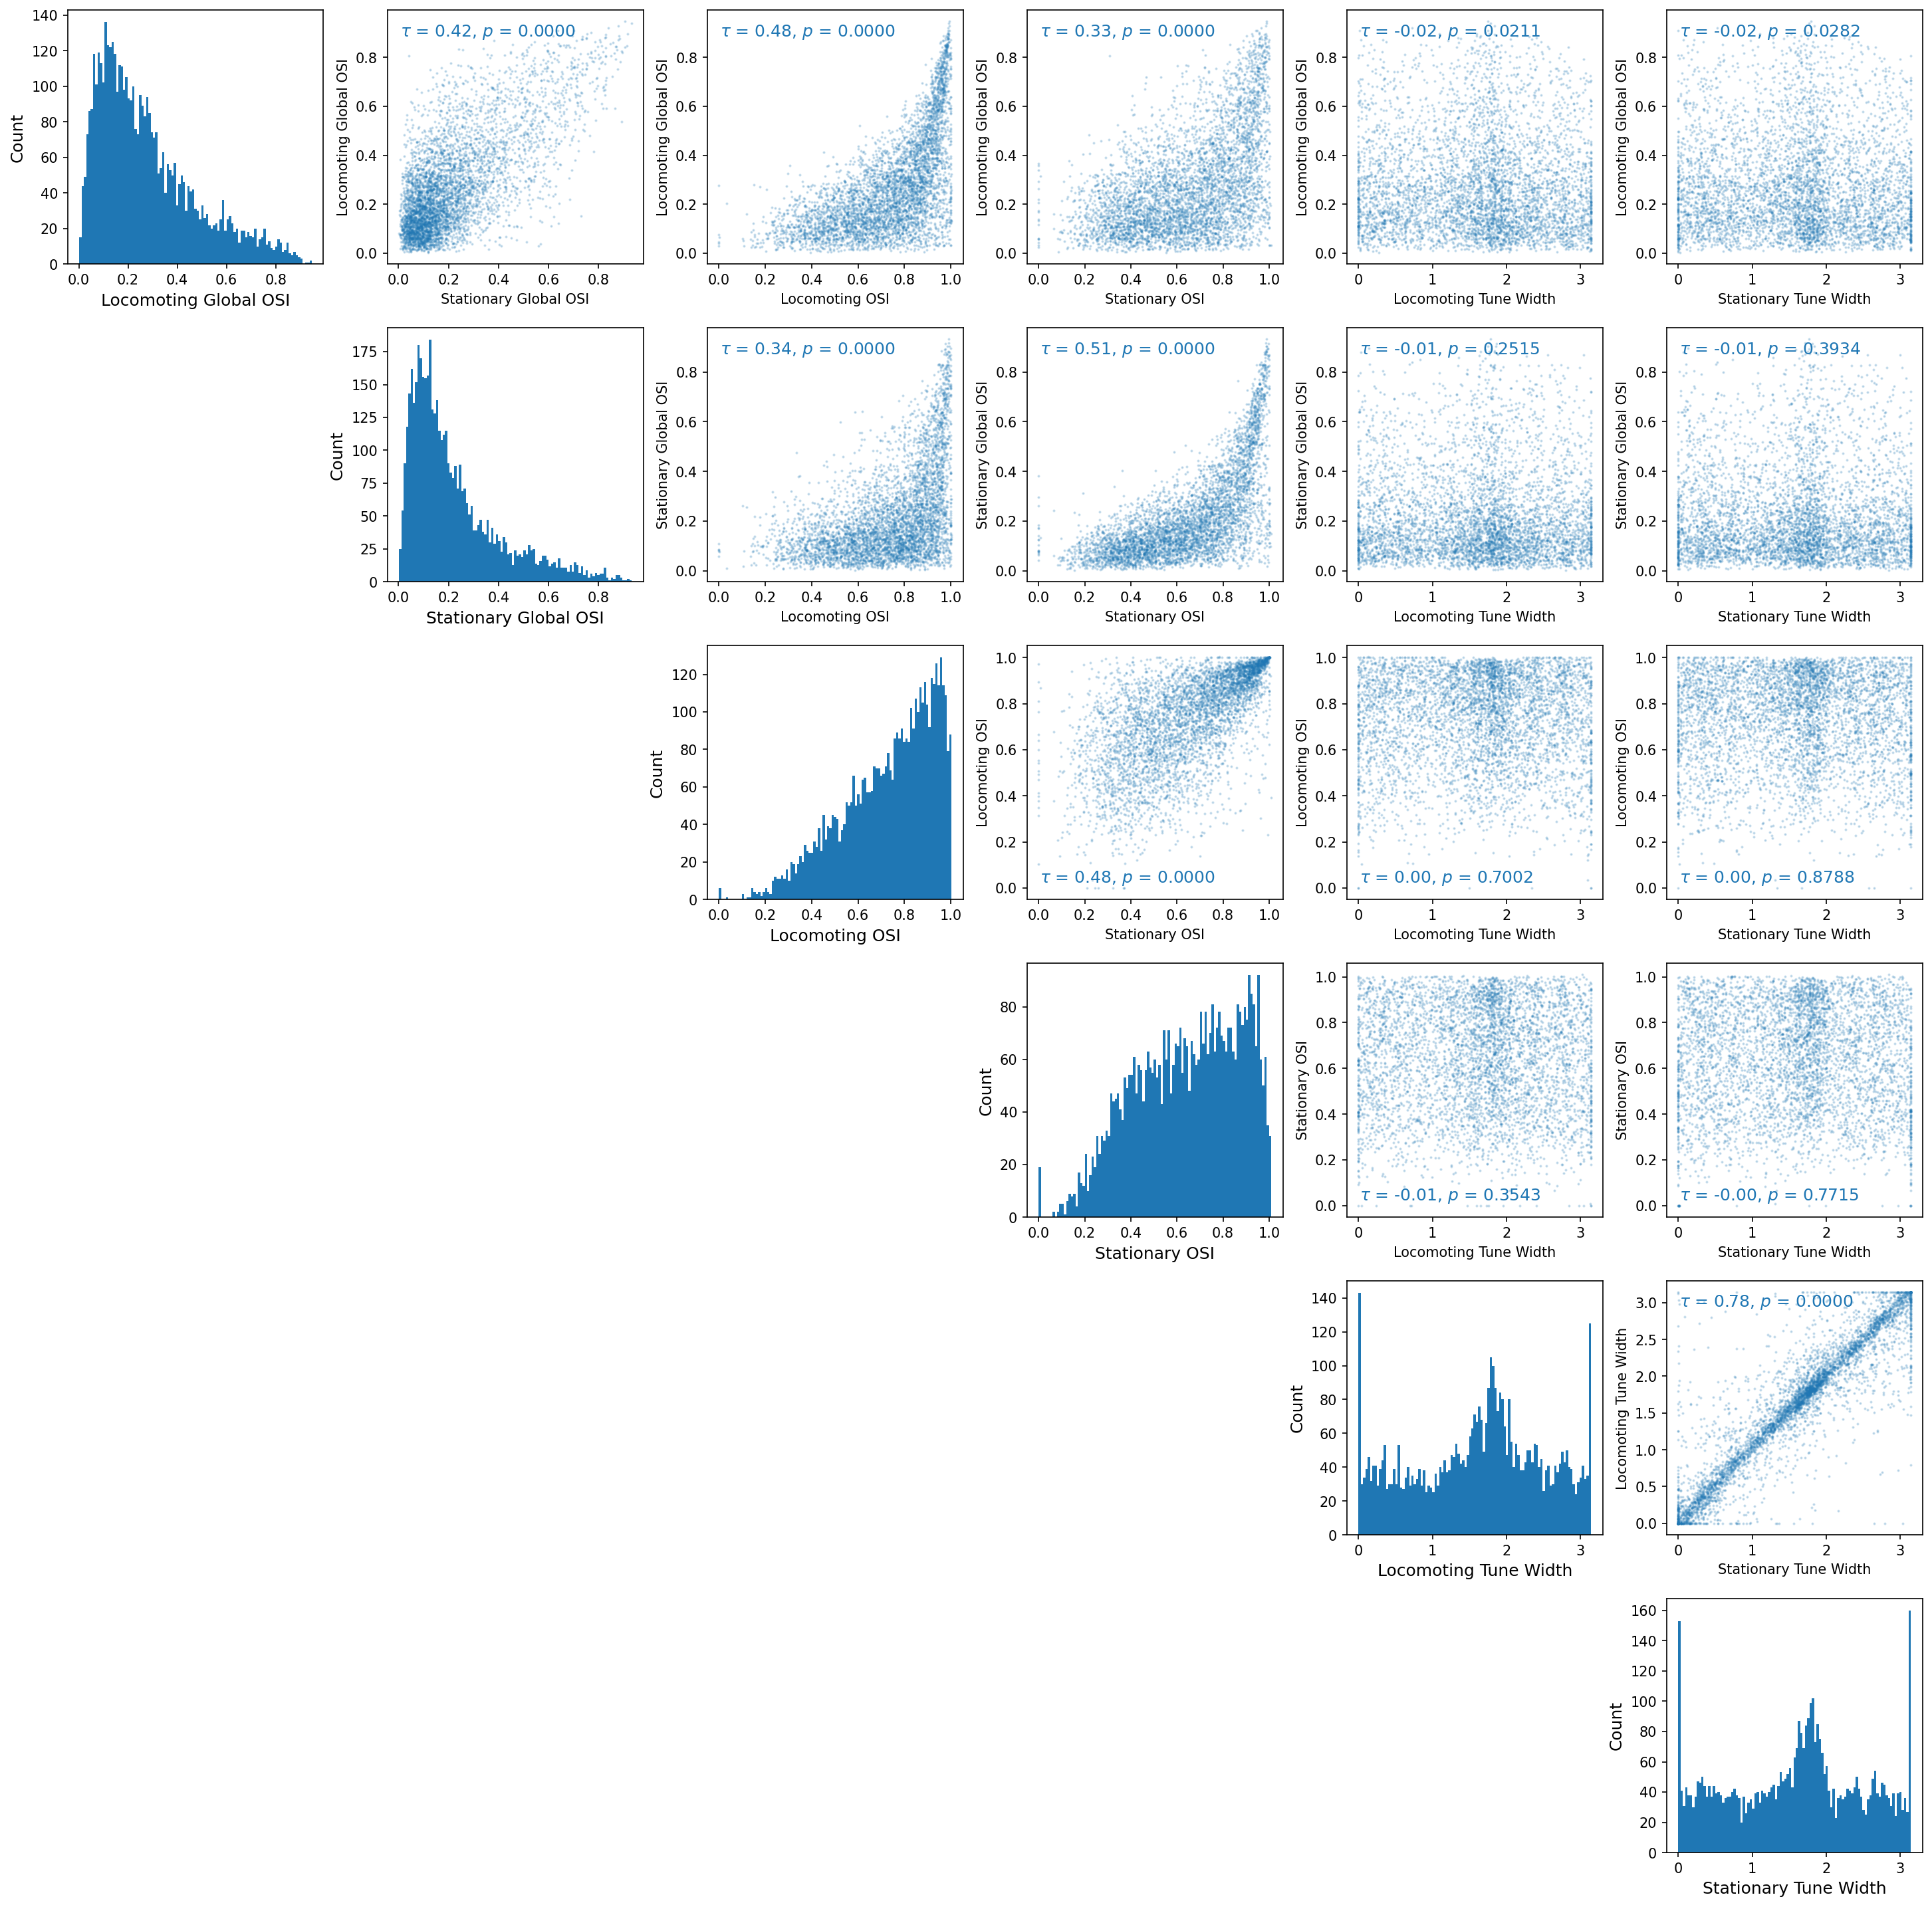

In [115]:
fig,axs=plt.subplots(6,6,figsize=(24,24),dpi=150)#,sharex='col',sharey='row',)
fig.subplots_adjust(hspace=0.25,wspace=0.25)

plot_data=np.concatenate((loco_glob_osi[None,good_idxs],stat_glob_osi[None,good_idxs],loco_osi[None,good_idxs],
                          stat_osi[None,good_idxs],loco_tune_width[None,good_idxs],stat_tune_width[None,good_idxs]),0)
labels=['Locomoting Global OSI','Stationary Global OSI','Locomoting OSI',
        'Stationary OSI','Locomoting Tune Width','Stationary Tune Width']
for i in range(len(plot_data)):
    for j in range(len(plot_data)):
        if i==j: continue
        if i>j:
            axs[i,j].set_axis_off()
for i in range(len(plot_data)):
    axs[i,i].hist(plot_data[i],101)
    axs[i,i].set_xlabel(labels[i],fontsize=12)
    axs[i,i].set_ylabel('Count',fontsize=12)
for i in range(len(plot_data)):
    for j in range(len(plot_data)):
        if i>=j: continue
        axs[i,j].scatter(plot_data[j],plot_data[i],s=1,alpha=0.2)
        axs[i,j].set_xlabel(labels[j])
        axs[i,j].set_ylabel(labels[i])
        taustat = kendalltau(plot_data[i],plot_data[j])
        if i in (2,3):
            axs[i,j].text(0.05,0.05,r'$\tau$ = {:.2f}, $p$ = {:.4f}'.format(taustat.statistic,taustat.pvalue),
                        color='C0',ha='left',va='bottom',transform=axs[i,j].transAxes,fontsize=12)
        else:
            axs[i,j].text(0.05,0.95,r'$\tau$ = {:.2f}, $p$ = {:.4f}'.format(taustat.statistic,taustat.pvalue),
                        color='C0',ha='left',va='top',transform=axs[i,j].transAxes,fontsize=12)

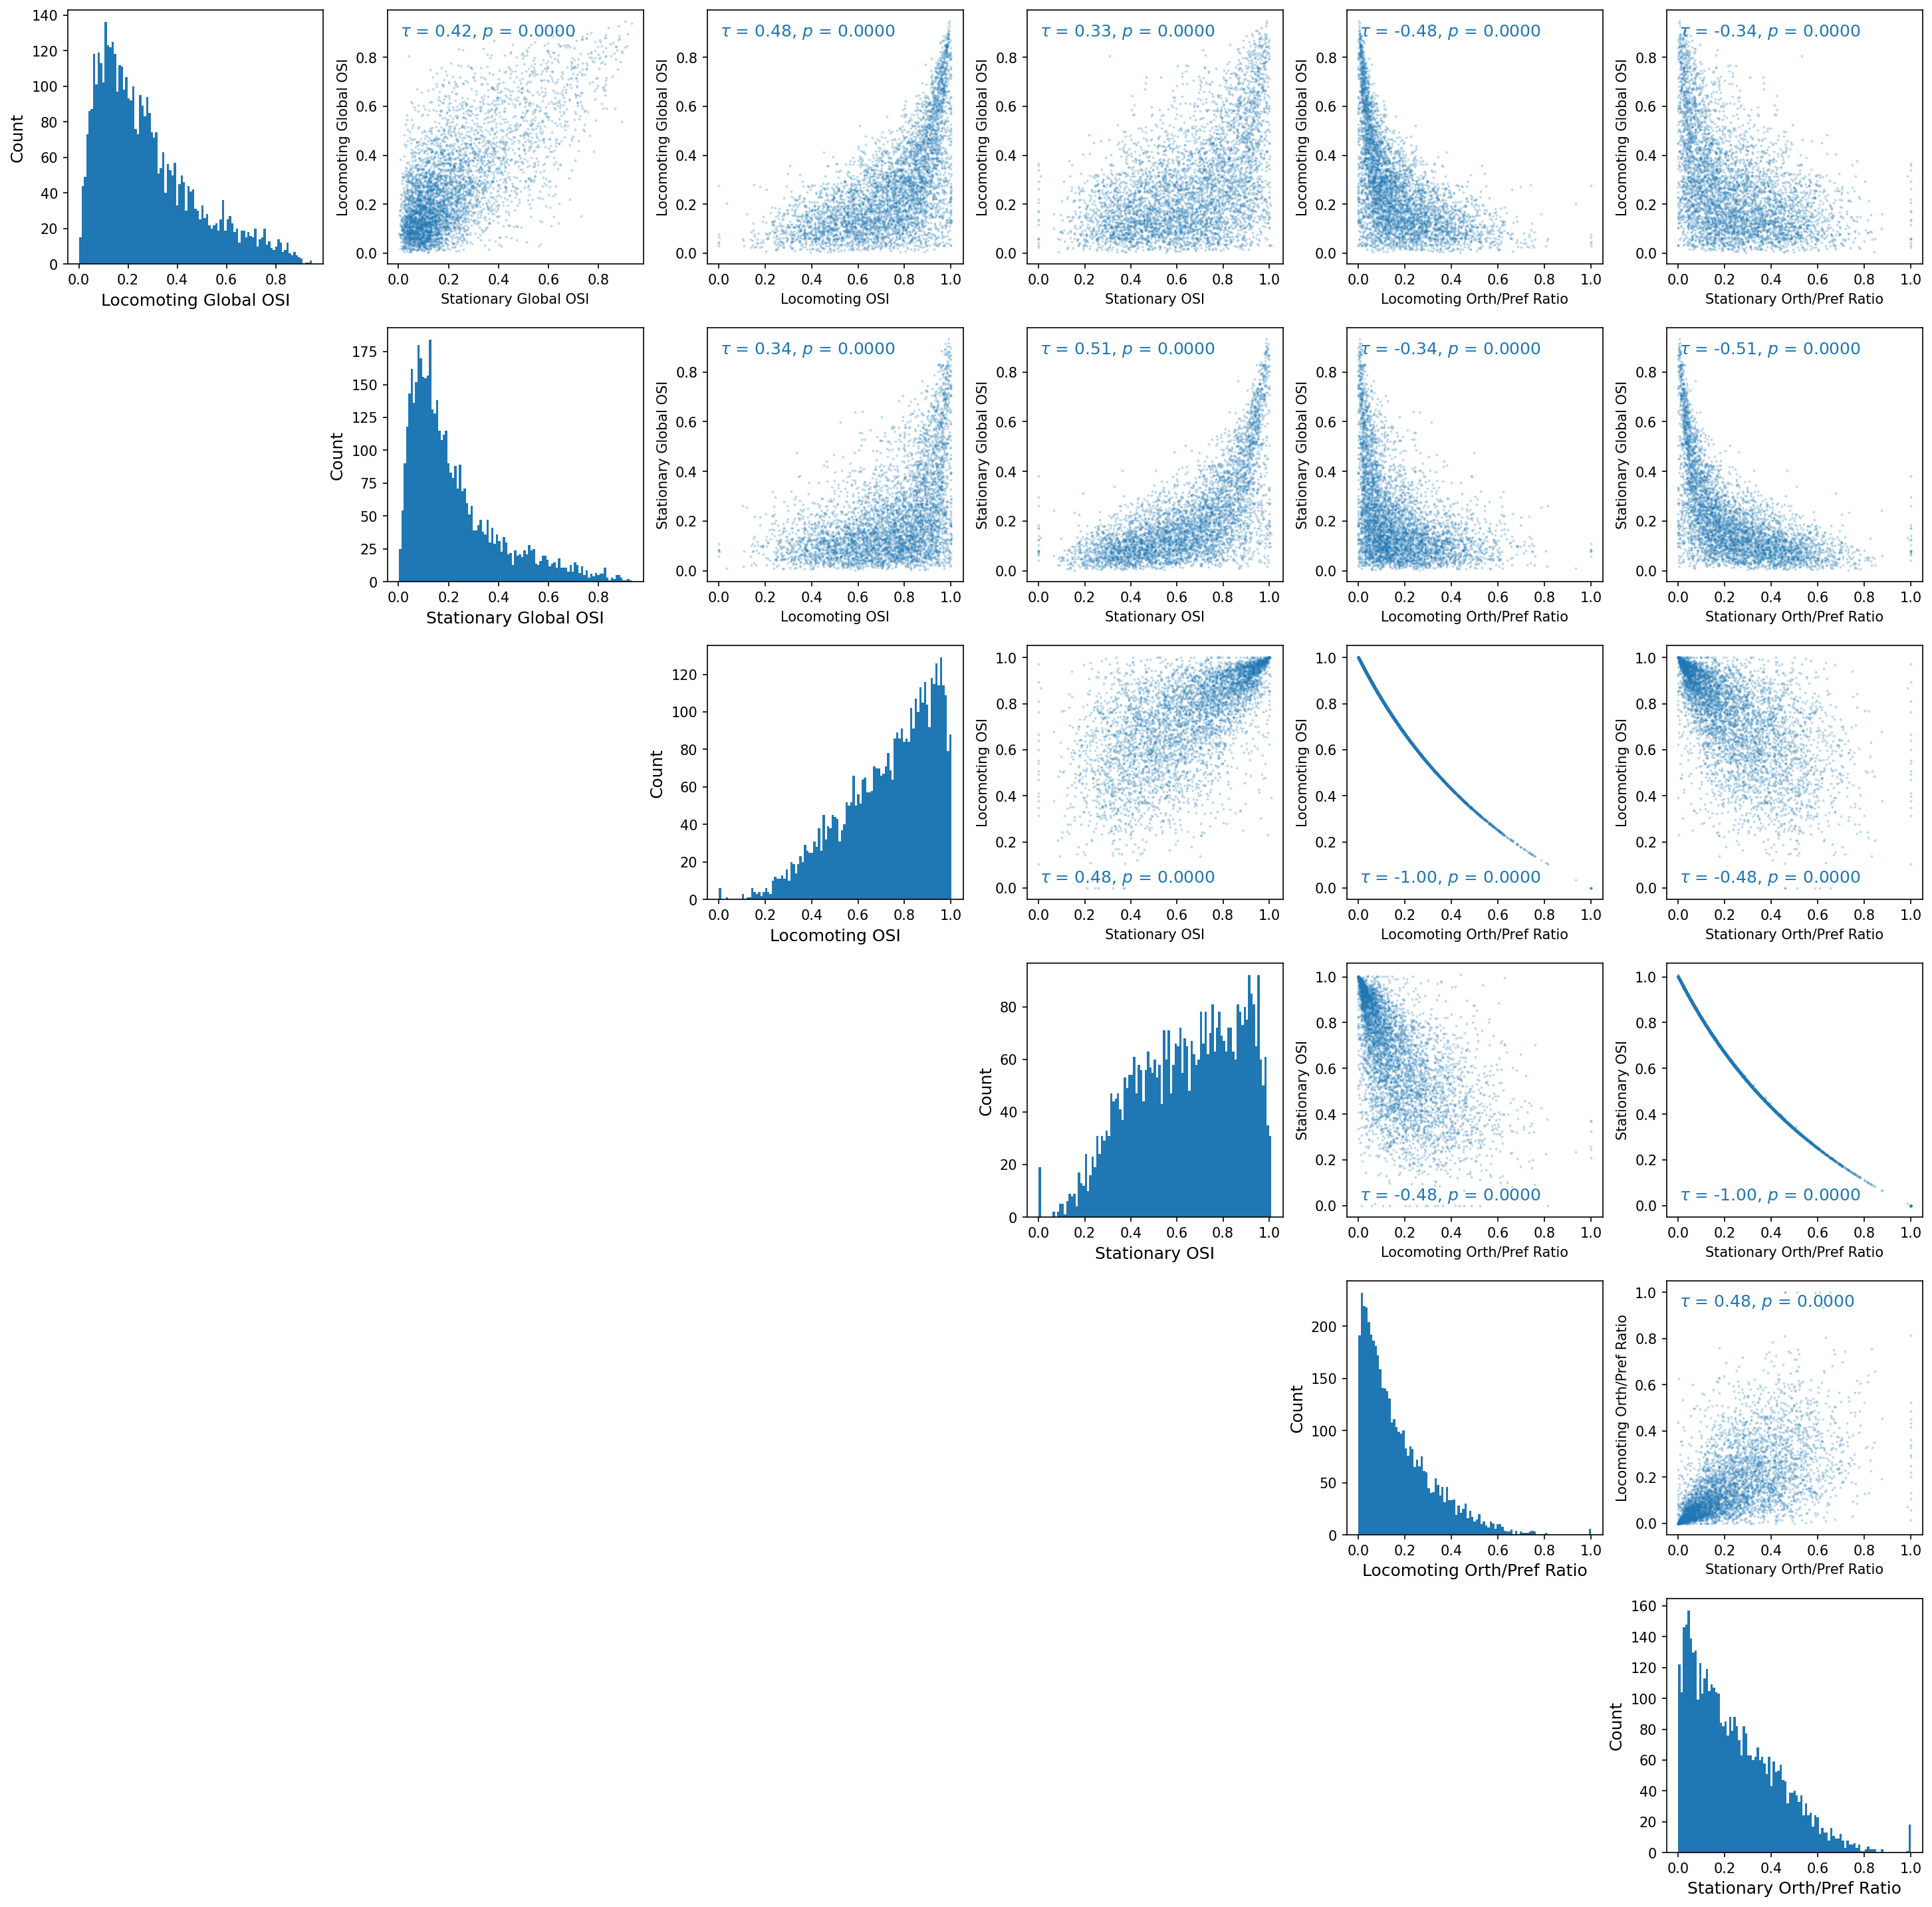

In [116]:
fig,axs=plt.subplots(6,6,figsize=(24,24),dpi=150)#,sharex='col',sharey='row',)
fig.subplots_adjust(hspace=0.25,wspace=0.25)

plot_data=np.concatenate((loco_glob_osi[None,good_idxs],stat_glob_osi[None,good_idxs],loco_osi[None,good_idxs],
                          stat_osi[None,good_idxs],(resp_loco_orth/resp_loco_pref)[None,good_idxs],
                          (resp_stat_orth/resp_stat_pref)[None,good_idxs]),0)
labels=['Locomoting Global OSI','Stationary Global OSI','Locomoting OSI',
        'Stationary OSI','Locomoting Orth/Pref Ratio','Stationary Orth/Pref Ratio']
for i in range(len(plot_data)):
    for j in range(len(plot_data)):
        if i==j: continue
        if i>j:
            axs[i,j].set_axis_off()
for i in range(len(plot_data)):
    axs[i,i].hist(plot_data[i],101)
    axs[i,i].set_xlabel(labels[i],fontsize=12)
    axs[i,i].set_ylabel('Count',fontsize=12)
for i in range(len(plot_data)):
    for j in range(len(plot_data)):
        if i>=j: continue
        axs[i,j].scatter(plot_data[j],plot_data[i],s=1,alpha=0.2)
        axs[i,j].set_xlabel(labels[j])
        axs[i,j].set_ylabel(labels[i])
        taustat = kendalltau(plot_data[i],plot_data[j])
        if i in (2,3):
            axs[i,j].text(0.05,0.05,r'$\tau$ = {:.2f}, $p$ = {:.4f}'.format(taustat.statistic,taustat.pvalue),
                        color='C0',ha='left',va='bottom',transform=axs[i,j].transAxes,fontsize=12)
        else:
            axs[i,j].text(0.05,0.95,r'$\tau$ = {:.2f}, $p$ = {:.4f}'.format(taustat.statistic,taustat.pvalue),
                        color='C0',ha='left',va='top',transform=axs[i,j].transAxes,fontsize=12)

In [128]:
print(np.mean(stat_glob_osi),np.std(stat_glob_osi)/np.sqrt(np.count_nonzero(good_idxs)))
print(np.mean(loco_glob_osi),np.std(loco_glob_osi)/np.sqrt(np.count_nonzero(good_idxs)))
print(np.mean(stat_osi),np.std(stat_osi)/np.sqrt(np.count_nonzero(good_idxs)))
print(np.mean(loco_osi),np.std(loco_osi)/np.sqrt(np.count_nonzero(good_idxs)))
print(np.mean(stat_tune_width),np.std(stat_tune_width)/np.sqrt(np.count_nonzero(good_idxs)))
print(np.mean(loco_tune_width),np.std(loco_tune_width)/np.sqrt(np.count_nonzero(good_idxs)))

0.21957500305537506 0.0026334928957934016
0.275446043849236 0.002894991897729746
0.6177443332536581 0.003708284705819086
0.7146316604008848 0.003242929970828262
1.755928695798976 0.04383794199540805
2.070427359882104 0.11585387378267825


In [14]:
from scipy.stats import ks_2samp

print(ks_2samp(stat_glob_osi,loco_glob_osi))
print(ks_2samp(stat_osi,loco_osi))
print(ks_2samp(stat_tune_width,loco_tune_width))
print('KS stat must be greater than '+str(np.sqrt(-np.log(0.05/2)/np.count_nonzero(good_idxs)))+' for distributions to be different')

KstestResult(statistic=0.1514, pvalue=2.186460475330227e-50, statistic_location=0.19312625025679206, statistic_sign=1)
KstestResult(statistic=0.1768, pvalue=1.1841500766229246e-68, statistic_location=0.6242932607060776, statistic_sign=1)
KstestResult(statistic=0.0274, pvalue=0.04685207649658501, statistic_location=1.7820448563477849, statistic_sign=1)
KS stat must be greater than 0.027982768502678446 for distributions to be different


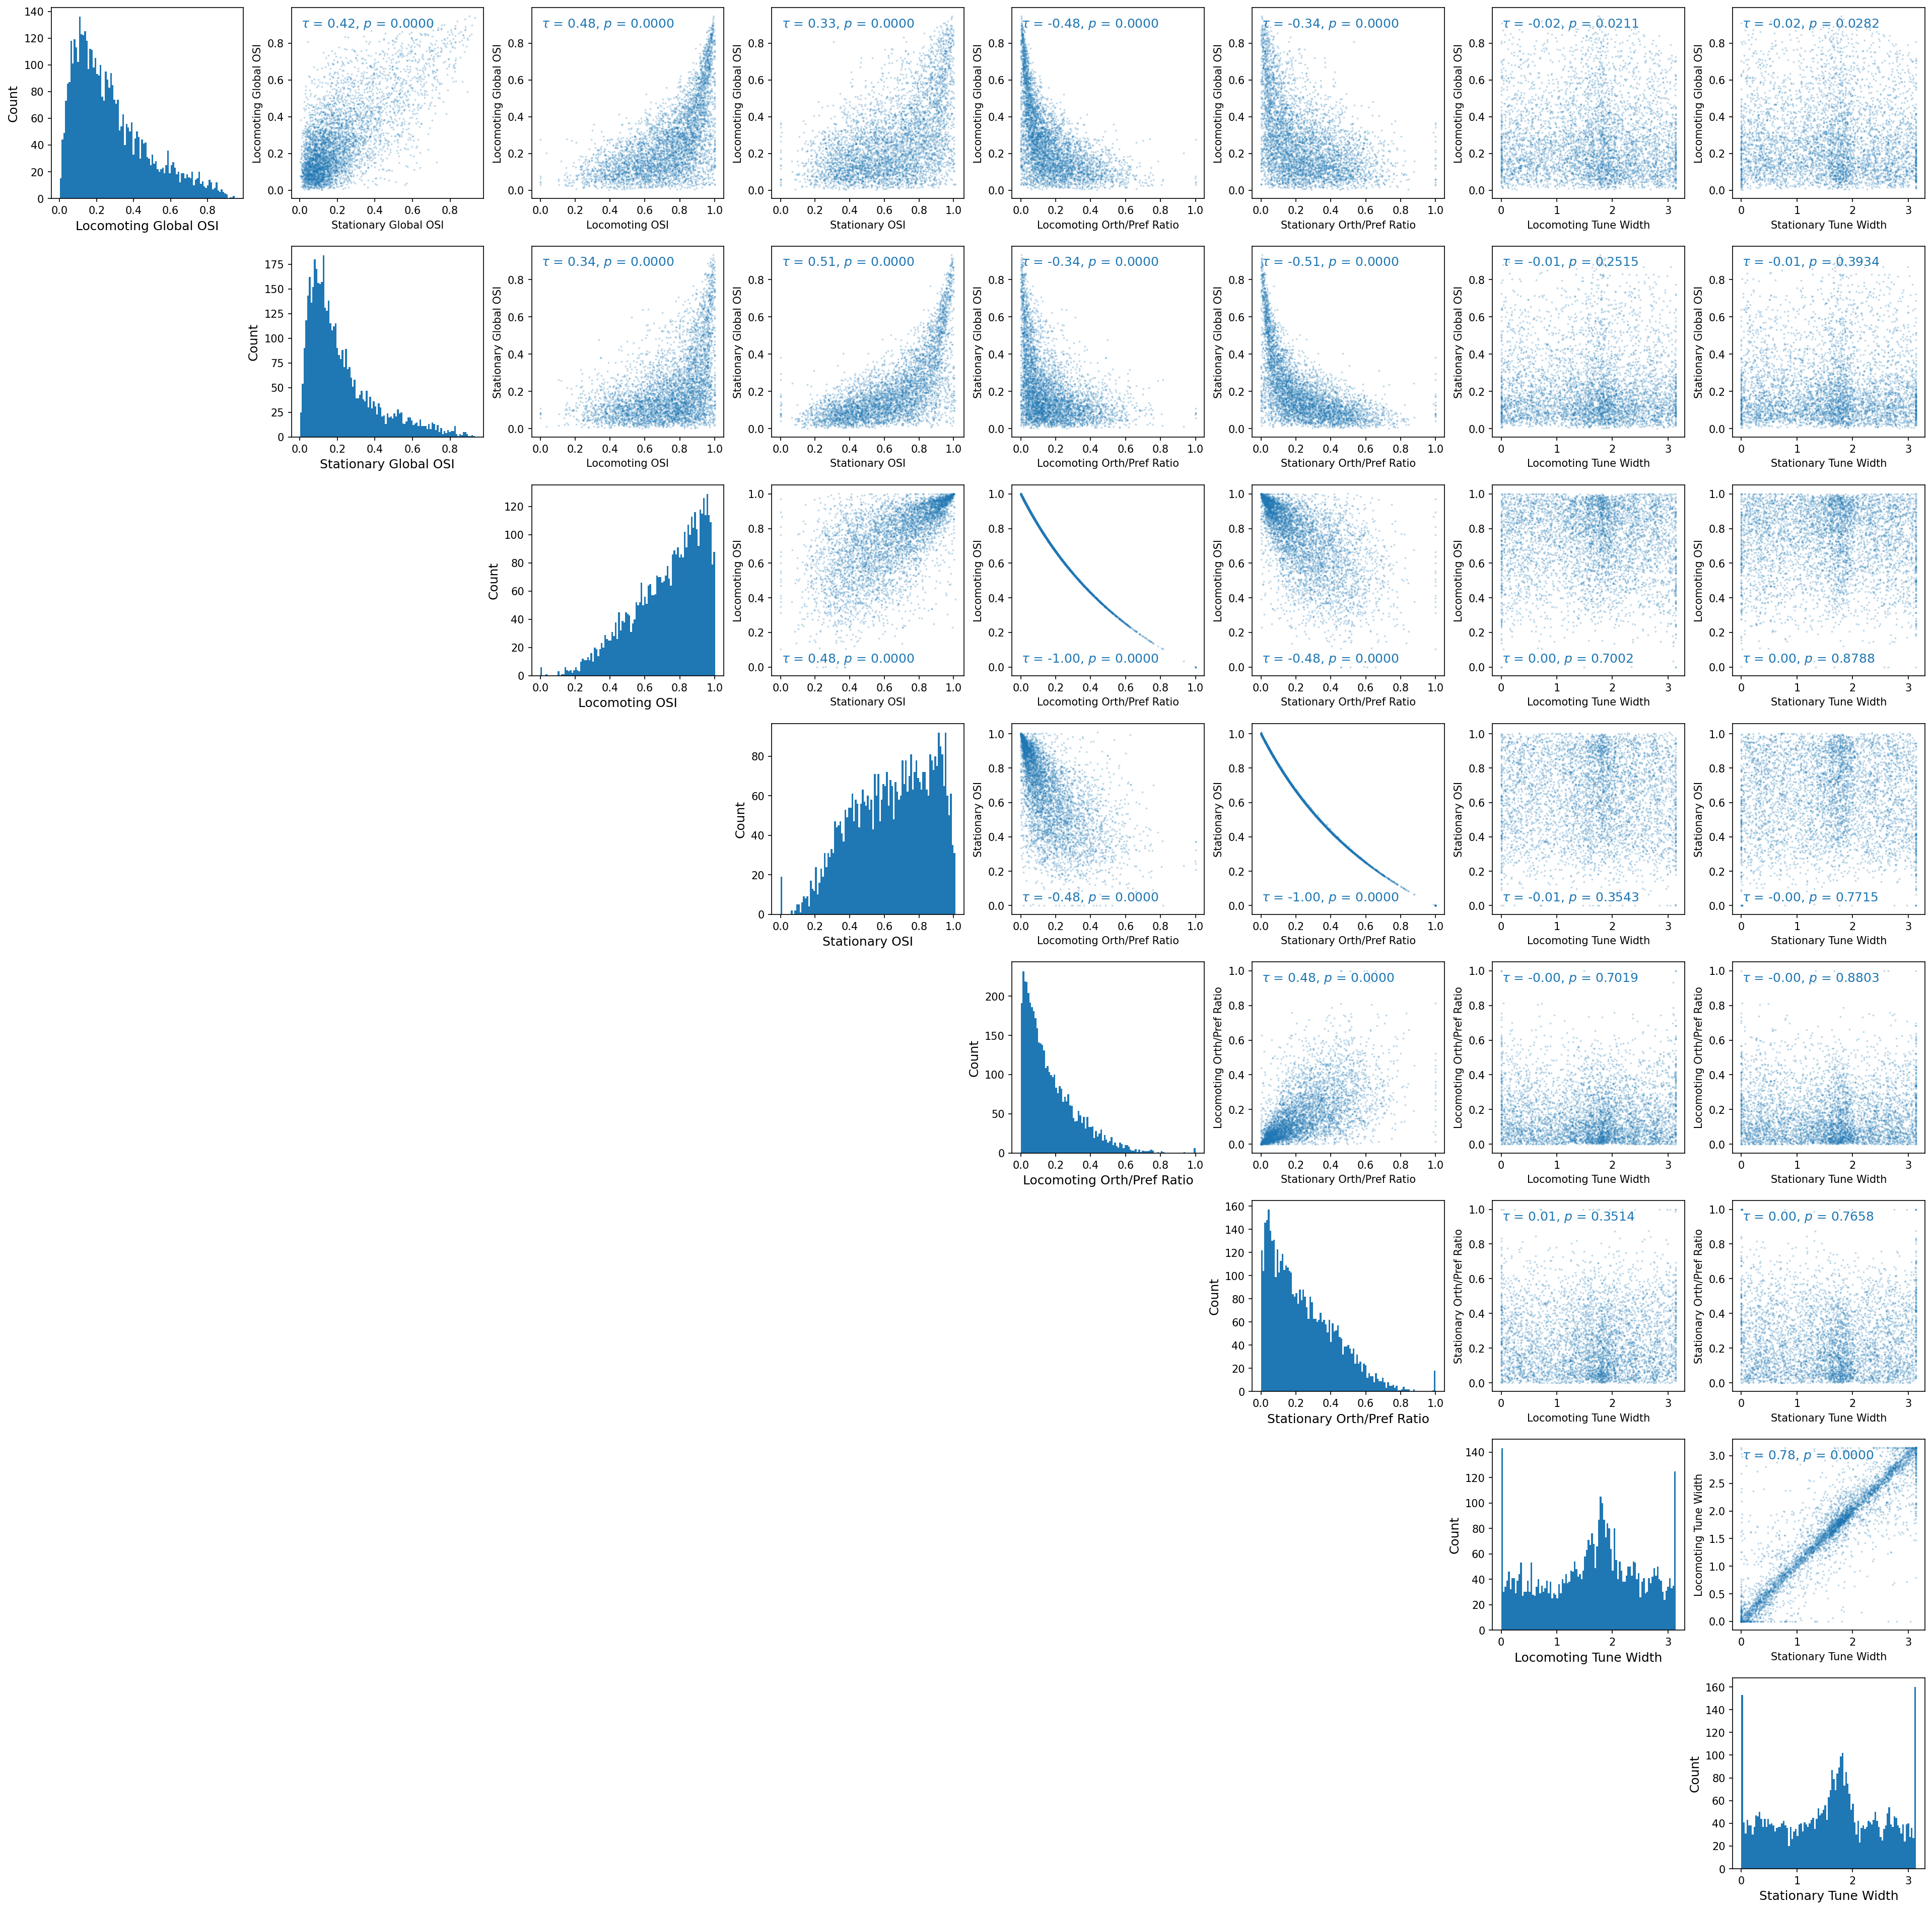

In [120]:
fig,axs=plt.subplots(8,8,figsize=(32,32),dpi=150)#,sharex='col',sharey='row',)
fig.subplots_adjust(hspace=0.25,wspace=0.25)

plot_data=np.concatenate((loco_glob_osi[None,good_idxs],stat_glob_osi[None,good_idxs],loco_osi[None,good_idxs],
                          stat_osi[None,good_idxs],(resp_loco_orth/resp_loco_pref)[None,good_idxs],
                          (resp_stat_orth/resp_stat_pref)[None,good_idxs],
                          loco_tune_width[None,good_idxs],stat_tune_width[None,good_idxs]),0)
labels=['Locomoting Global OSI','Stationary Global OSI','Locomoting OSI',
        'Stationary OSI','Locomoting Orth/Pref Ratio','Stationary Orth/Pref Ratio',
        'Locomoting Tune Width','Stationary Tune Width']
for i in range(len(plot_data)):
    for j in range(len(plot_data)):
        if i==j: continue
        if i>j:
            axs[i,j].set_axis_off()
for i in range(len(plot_data)):
    axs[i,i].hist(plot_data[i],101)
    axs[i,i].set_xlabel(labels[i],fontsize=12)
    axs[i,i].set_ylabel('Count',fontsize=12)
for i in range(len(plot_data)):
    for j in range(len(plot_data)):
        if i>=j: continue
        axs[i,j].scatter(plot_data[j],plot_data[i],s=1,alpha=0.2)
        axs[i,j].set_xlabel(labels[j])
        axs[i,j].set_ylabel(labels[i])
        taustat = kendalltau(plot_data[i],plot_data[j])
        if i in (2,3):
            axs[i,j].text(0.05,0.05,r'$\tau$ = {:.2f}, $p$ = {:.4f}'.format(taustat.statistic,taustat.pvalue),
                        color='C0',ha='left',va='bottom',transform=axs[i,j].transAxes,fontsize=12)
        else:
            axs[i,j].text(0.05,0.95,r'$\tau$ = {:.2f}, $p$ = {:.4f}'.format(taustat.statistic,taustat.pvalue),
                        color='C0',ha='left',va='top',transform=axs[i,j].transAxes,fontsize=12)

In [118]:
np.count_nonzero(resp_stat_orth[good_idxs] < resp_spnt[good_idxs]) / np.count_nonzero(good_idxs)

0.006155805561451921

Text(0, 0.5, 'Count')

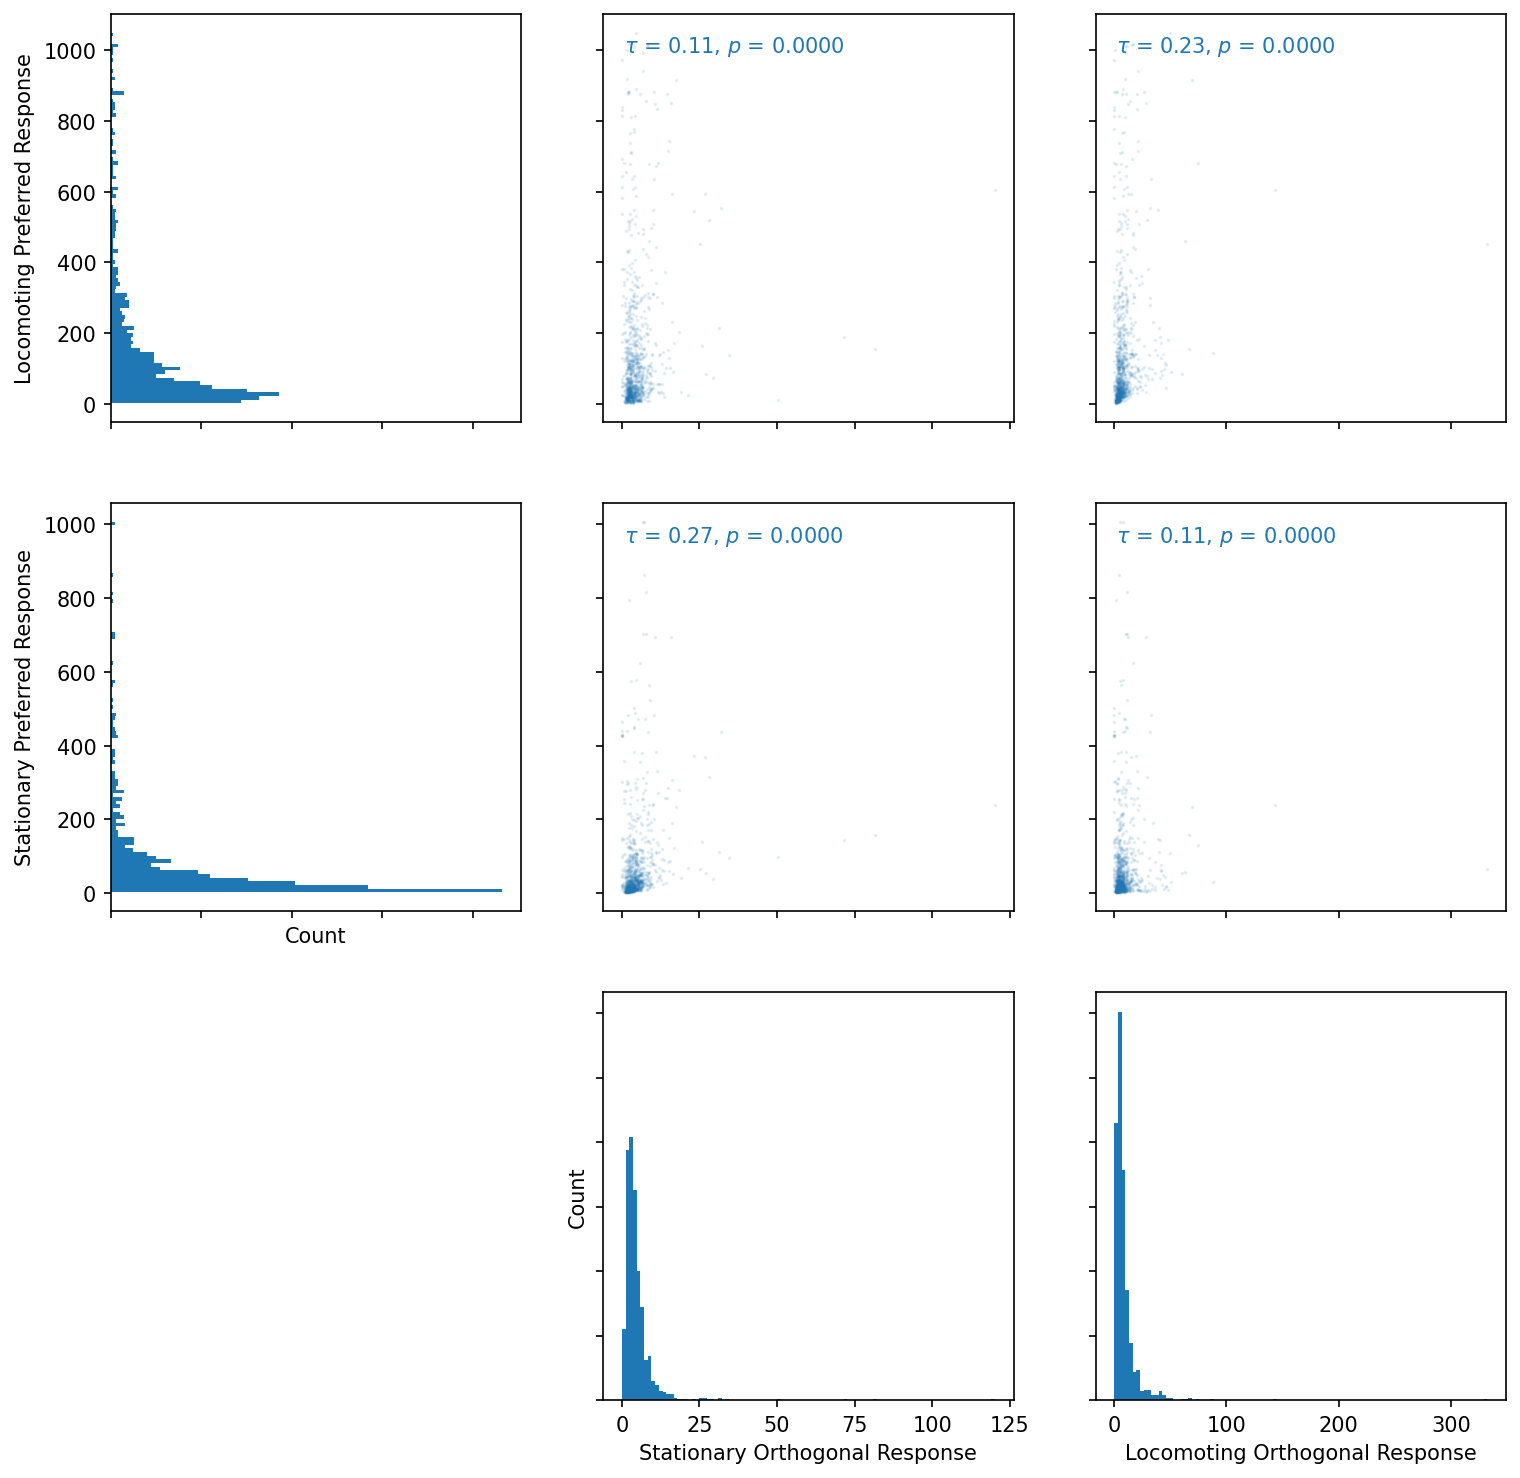

In [70]:
fig,axs=plt.subplots(3,3,figsize=(12,12),dpi=150,sharex='col',sharey='row')

axs[0,0].hist(resp_loco_pref[good_idxs],101,orientation='horizontal')
axs[1,0].hist(resp_stat_pref[good_idxs],101,orientation='horizontal')
axs[0,1].scatter(resp_stat_orth[good_idxs],resp_loco_pref[good_idxs],s=0.5,alpha=0.1)
axs[0,2].scatter(resp_loco_orth[good_idxs],resp_loco_pref[good_idxs],s=0.5,alpha=0.1)
axs[1,1].scatter(resp_stat_orth[good_idxs],resp_stat_pref[good_idxs],s=0.5,alpha=0.1)
axs[1,2].scatter(resp_loco_orth[good_idxs],resp_stat_pref[good_idxs],s=0.5,alpha=0.1)
axs[2,1].hist(resp_stat_orth[good_idxs],101)
axs[2,2].hist(resp_loco_orth[good_idxs],101)
axs[2,0].set_axis_off()

taustat = kendalltau(resp_stat_orth[good_idxs],resp_loco_pref[good_idxs])
axs[0,1].text(0.05,0.95,r'$\tau$ = {:.2f}, $p$ = {:.4f}'.format(taustat.statistic,taustat.pvalue),
              color='C0',ha='left',va='top',transform=axs[0,1].transAxes)
taustat = kendalltau(resp_loco_orth[good_idxs],resp_loco_pref[good_idxs])
axs[0,2].text(0.05,0.95,r'$\tau$ = {:.2f}, $p$ = {:.4f}'.format(taustat.statistic,taustat.pvalue),
              color='C0',ha='left',va='top',transform=axs[0,2].transAxes)
taustat = kendalltau(resp_stat_orth[good_idxs],resp_stat_pref[good_idxs])
axs[1,1].text(0.05,0.95,r'$\tau$ = {:.2f}, $p$ = {:.4f}'.format(taustat.statistic,taustat.pvalue),
              color='C0',ha='left',va='top',transform=axs[1,1].transAxes)
taustat = kendalltau(resp_loco_orth[good_idxs],resp_stat_pref[good_idxs])
axs[1,2].text(0.05,0.95,r'$\tau$ = {:.2f}, $p$ = {:.4f}'.format(taustat.statistic,taustat.pvalue),
              color='C0',ha='left',va='top',transform=axs[1,2].transAxes)

axs[0,0].set_ylabel('Locomoting Preferred Response')
axs[1,0].set_ylabel('Stationary Preferred Response')
axs[2,1].set_xlabel('Stationary Orthogonal Response')
axs[2,2].set_xlabel('Locomoting Orthogonal Response')
axs[1,0].set_xlabel('Count')
axs[2,1].set_ylabel('Count')

/var/folders/sm/hlw5tfpd0p385cm1782mwjmh0000gq/T/ipykernel_8708/221313639.py:4: RuntimeWarning: divide by zero encountered in divide
  axs[1].hist(np.log10(((resp_loco_pref-resp_loco_orth)/(resp_stat_pref-resp_stat_orth))[good_idxs]),np.linspace(-1,2,101))
/var/folders/sm/hlw5tfpd0p385cm1782mwjmh0000gq/T/ipykernel_8708/221313639.py:4: RuntimeWarning: invalid value encountered in divide
  axs[1].hist(np.log10(((resp_loco_pref-resp_loco_orth)/(resp_stat_pref-resp_stat_orth))[good_idxs]),np.linspace(-1,2,101))
/var/folders/sm/hlw5tfpd0p385cm1782mwjmh0000gq/T/ipykernel_8708/221313639.py:5: RuntimeWarning: divide by zero encountered in divide
  axs[2].hist(np.log10((loco_osi/stat_osi)[good_idxs]),np.linspace(-0.5,0.5,101))
/var/folders/sm/hlw5tfpd0p385cm1782mwjmh0000gq/T/ipykernel_8708/221313639.py:5: RuntimeWarning: invalid value encountered in divide
  axs[2].hist(np.log10((loco_osi/stat_osi)[good_idxs]),np.linspace(-0.5,0.5,101))
/var/folders/sm/hlw5tfpd0p385cm1782mwjmh0000gq/T/ipykernel

Text(0.5, 1.0, 'Log10 of Loco/Stat Amplitude')

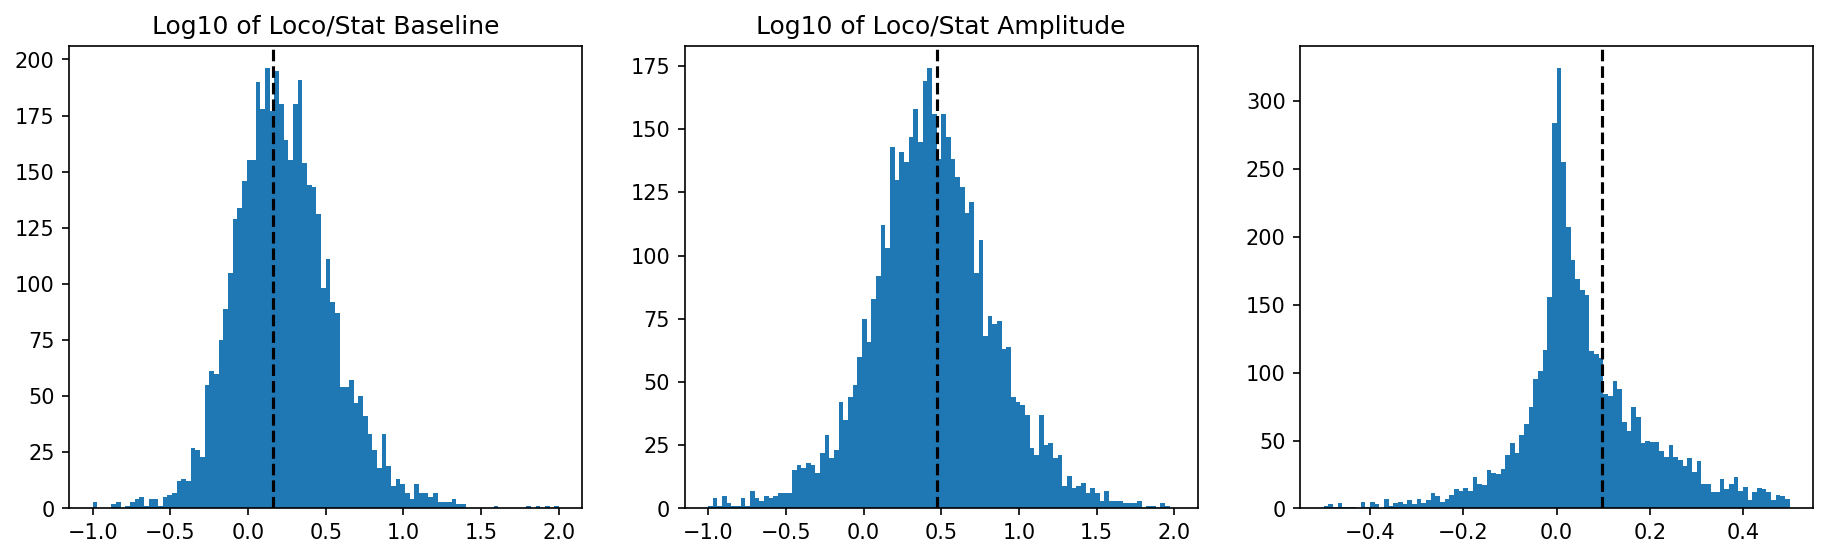

In [29]:
fig,axs = plt.subplots(1,3,figsize=(15,4),dpi=150)

axs[0].hist(np.log10((resp_loco_orth/resp_stat_orth)[good_idxs]),np.linspace(-1,2,101))
axs[1].hist(np.log10(((resp_loco_pref-resp_loco_orth)/(resp_stat_pref-resp_stat_orth))[good_idxs]),np.linspace(-1,2,101))
axs[2].hist(np.log10((loco_osi/stat_osi)[good_idxs]),np.linspace(-0.5,0.5,101))

axs[0].axvline(np.mean(np.log10((resp_loco_orth/resp_stat_orth)[good_idxs])),c='k',ls="--")
axs[1].axvline(np.mean(np.log10(((resp_loco_pref-resp_loco_orth)/(resp_stat_pref-resp_stat_orth))[good_idxs])),c='k',ls="--")
axs[2].axvline(np.mean(np.log10((loco_osi/stat_osi)[good_idxs])),c='k',ls="--")

# axs[0].axvline(np.log10(np.mean((resp_loco_orth/resp_stat_orth)[good_idxs])),c='k',ls=':')
# axs[1].axvline(np.log10(np.mean(((resp_loco_pref-resp_loco_orth)/(resp_stat_pref-resp_stat_orth))[good_idxs])),c='k',ls=':')
# axs[2].axvline(np.log10(np.mean((loco_osi/stat_osi)[good_idxs])),c='k',ls=':')

axs[0].set_title('Log10 of Loco/Stat Baseline')
axs[1].set_title('Log10 of Loco/Stat Amplitude')

Text(0, 0.5, 'Count')

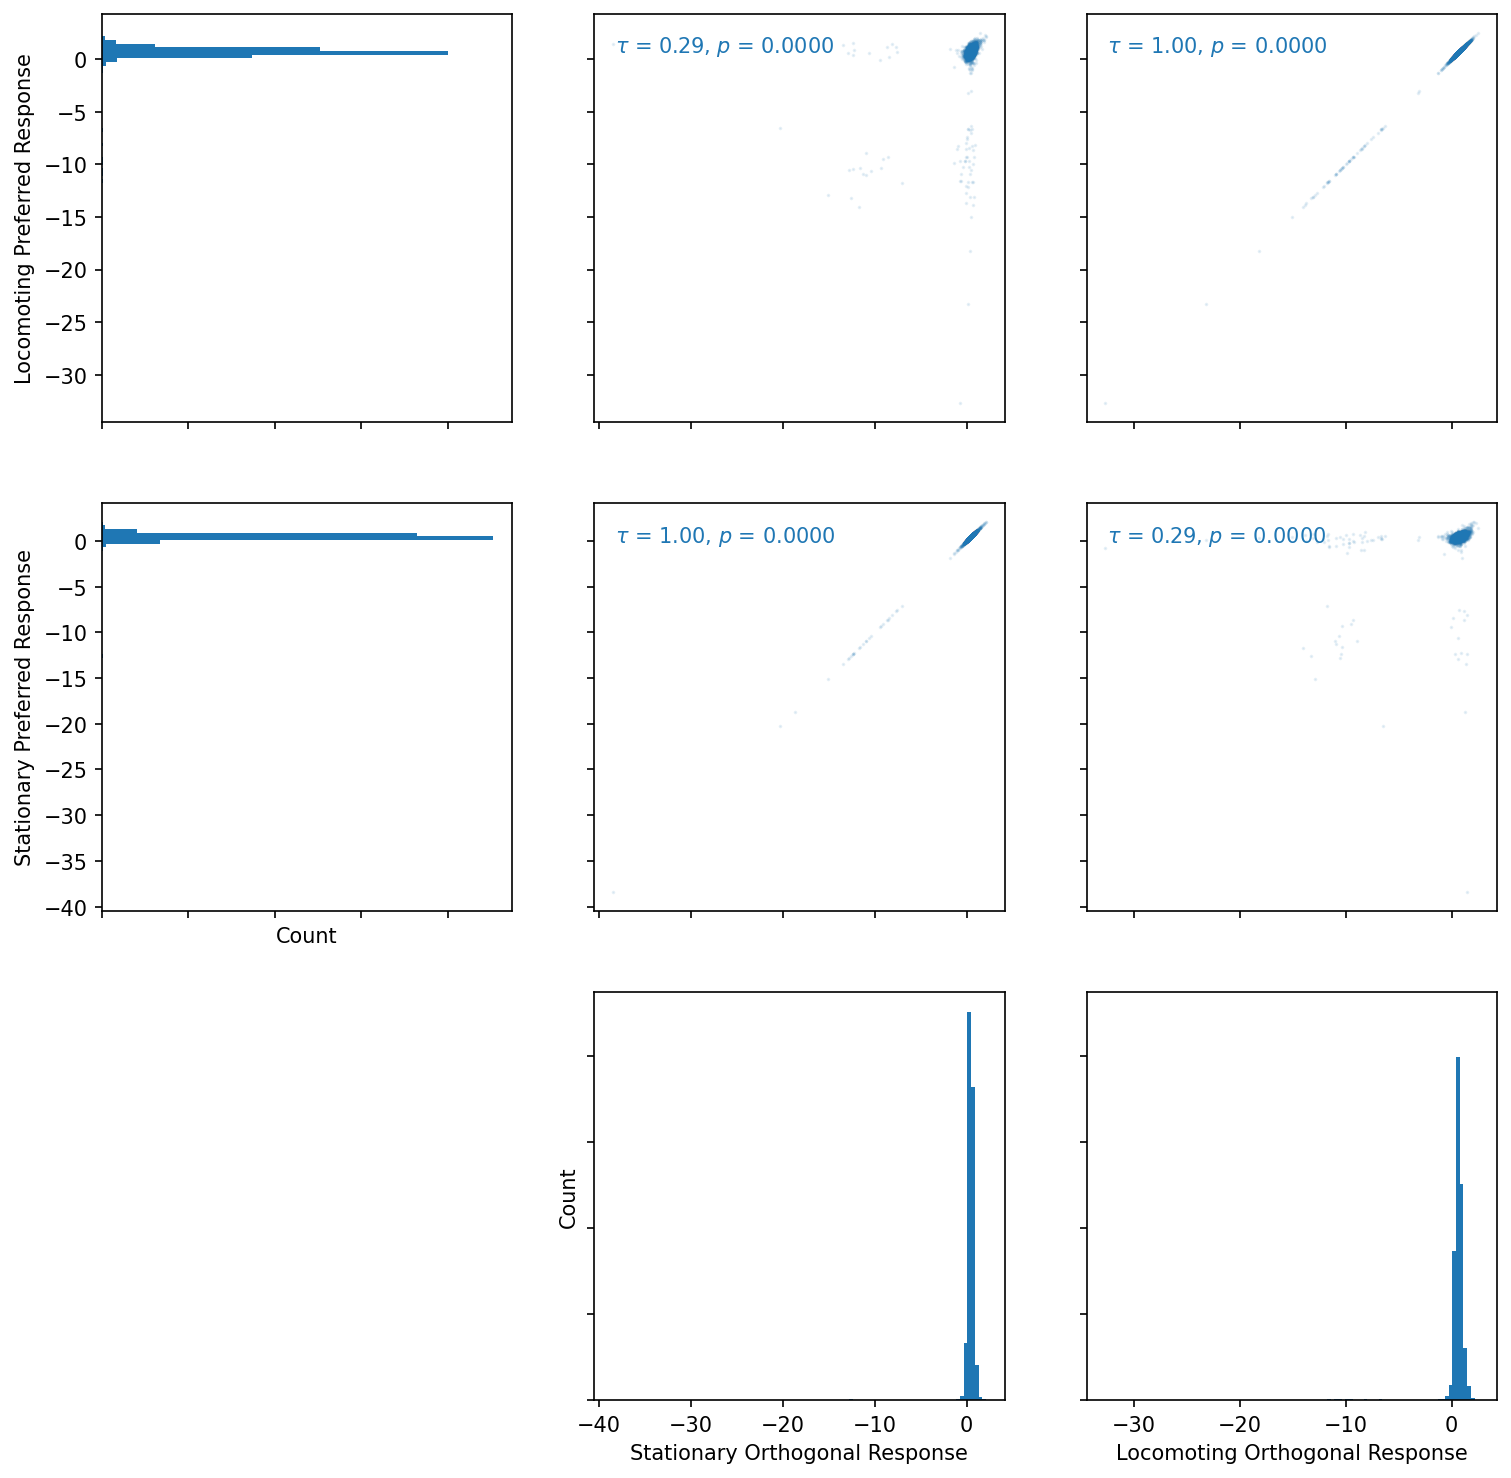

In [30]:
fig,axs=plt.subplots(3,3,figsize=(12,12),dpi=150,sharex='col',sharey='row')

axs[0,0].hist(np.log10(resp_loco_orth)[good_idxs],101,orientation='horizontal')
axs[1,0].hist(np.log10(resp_stat_orth)[good_idxs],101,orientation='horizontal')
axs[0,1].scatter(np.log10(resp_stat_orth)[good_idxs],np.log10(resp_loco_orth)[good_idxs],s=0.5,alpha=0.1)
axs[0,2].scatter(np.log10(resp_loco_orth)[good_idxs],np.log10(resp_loco_orth)[good_idxs],s=0.5,alpha=0.1)
axs[1,1].scatter(np.log10(resp_stat_orth)[good_idxs],np.log10(resp_stat_orth)[good_idxs],s=0.5,alpha=0.1)
axs[1,2].scatter(np.log10(resp_loco_orth)[good_idxs],np.log10(resp_stat_orth)[good_idxs],s=0.5,alpha=0.1)
axs[2,1].hist(np.log10(resp_stat_orth)[good_idxs],101)
axs[2,2].hist(np.log10(resp_loco_orth)[good_idxs],101)
axs[2,0].set_axis_off()

taustat = kendalltau(np.log10(resp_stat_orth)[good_idxs],np.log10(resp_loco_orth)[good_idxs])
axs[0,1].text(0.05,0.95,r'$\tau$ = {:.2f}, $p$ = {:.4f}'.format(taustat.statistic,taustat.pvalue),
              color='C0',ha='left',va='top',transform=axs[0,1].transAxes)
taustat = kendalltau(np.log10(resp_loco_orth)[good_idxs],np.log10(resp_loco_orth)[good_idxs])
axs[0,2].text(0.05,0.95,r'$\tau$ = {:.2f}, $p$ = {:.4f}'.format(taustat.statistic,taustat.pvalue),
              color='C0',ha='left',va='top',transform=axs[0,2].transAxes)
taustat = kendalltau(np.log10(resp_stat_orth)[good_idxs],np.log10(resp_stat_orth)[good_idxs])
axs[1,1].text(0.05,0.95,r'$\tau$ = {:.2f}, $p$ = {:.4f}'.format(taustat.statistic,taustat.pvalue),
              color='C0',ha='left',va='top',transform=axs[1,1].transAxes)
taustat = kendalltau(np.log10(resp_loco_orth)[good_idxs],np.log10(resp_stat_orth)[good_idxs])
axs[1,2].text(0.05,0.95,r'$\tau$ = {:.2f}, $p$ = {:.4f}'.format(taustat.statistic,taustat.pvalue),
              color='C0',ha='left',va='top',transform=axs[1,2].transAxes)

axs[0,0].set_ylabel('Locomoting Preferred Response')
axs[1,0].set_ylabel('Stationary Preferred Response')
axs[2,1].set_xlabel('Stationary Orthogonal Response')
axs[2,2].set_xlabel('Locomoting Orthogonal Response')
axs[1,0].set_xlabel('Count')
axs[2,1].set_ylabel('Count')

In [1]:
fig,axs=plt.subplots(3,3,figsize=(12,12),dpi=150,sharex='col',sharey='row')

axs[0,0].hist(resp_loco_pref[good_idxs],101,orientation='horizontal')
axs[1,0].hist(resp_stat_pref[good_idxs],101,orientation='horizontal')
axs[0,1].scatter(resp_stat_orth[good_idxs],resp_loco_pref[good_idxs],s=0.5,alpha=0.1)
axs[0,2].scatter(resp_loco_orth[good_idxs],resp_loco_pref[good_idxs],s=0.5,alpha=0.1)
axs[1,1].scatter(resp_stat_orth[good_idxs],resp_stat_pref[good_idxs],s=0.5,alpha=0.1)
axs[1,2].scatter(resp_loco_orth[good_idxs],resp_stat_pref[good_idxs],s=0.5,alpha=0.1)
axs[2,1].hist(resp_stat_orth[good_idxs],101)
axs[2,2].hist(resp_loco_orth[good_idxs],101)
axs[2,0].set_axis_off()

taustat = kendalltau(resp_stat_orth[good_idxs],resp_loco_pref[good_idxs])
axs[0,1].text(0.05,0.95,r'$\tau$ = {:.2f}, $p$ = {:.4f}'.format(taustat.statistic,taustat.pvalue),
              color='C0',ha='left',va='top',transform=axs[0,1].transAxes)
taustat = kendalltau(resp_loco_orth[good_idxs],resp_loco_pref[good_idxs])
axs[0,2].text(0.05,0.95,r'$\tau$ = {:.2f}, $p$ = {:.4f}'.format(taustat.statistic,taustat.pvalue),
              color='C0',ha='left',va='top',transform=axs[0,2].transAxes)
taustat = kendalltau(resp_stat_orth[good_idxs],resp_stat_pref[good_idxs])
axs[1,1].text(0.05,0.95,r'$\tau$ = {:.2f}, $p$ = {:.4f}'.format(taustat.statistic,taustat.pvalue),
              color='C0',ha='left',va='top',transform=axs[1,1].transAxes)
taustat = kendalltau(resp_loco_orth[good_idxs],resp_stat_pref[good_idxs])
axs[1,2].text(0.05,0.95,r'$\tau$ = {:.2f}, $p$ = {:.4f}'.format(taustat.statistic,taustat.pvalue),
              color='C0',ha='left',va='top',transform=axs[1,2].transAxes)

axs[0,0].set_ylabel('Locomoting Preferred Response')
axs[1,0].set_ylabel('Stationary Preferred Response')
axs[2,1].set_xlabel('Stationary Orthogonal Response')
axs[2,2].set_xlabel('Locomoting Orthogonal Response')
axs[1,0].set_xlabel('Count')
axs[2,1].set_ylabel('Count')

NameError: name 'plt' is not defined

Text(0, 0.5, 'Count')

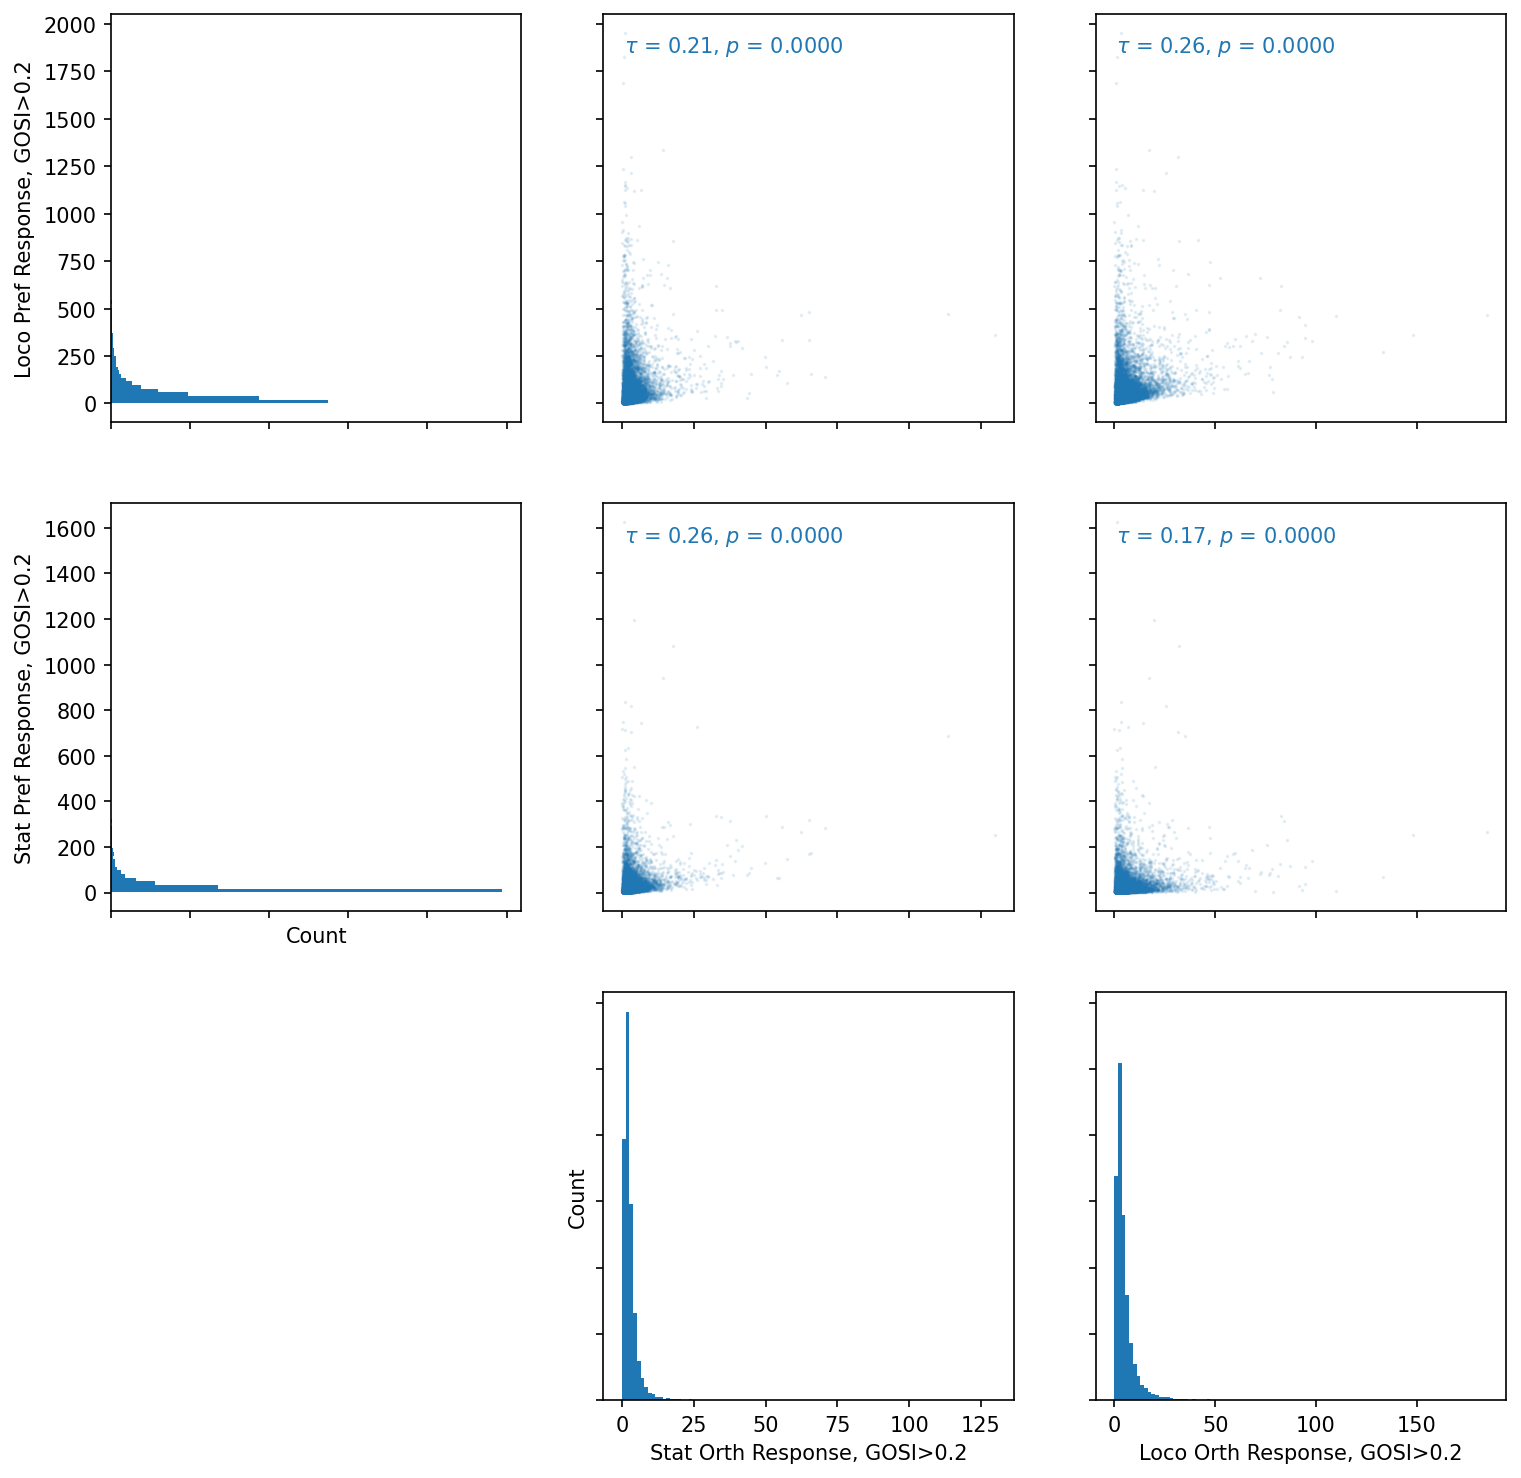

In [265]:
fig,axs=plt.subplots(3,3,figsize=(12,12),dpi=150,sharex='col',sharey='row')

GOSI_cut=0.2
axs[0,0].hist(resp_loco_pref[ori_sel>GOSI_cut],101,orientation='horizontal')
axs[1,0].hist(resp_stat_pref[ori_sel>GOSI_cut],101,orientation='horizontal')
axs[0,1].scatter(resp_stat_orth[ori_sel>GOSI_cut],resp_loco_pref[ori_sel>GOSI_cut],s=0.5,alpha=0.1)
axs[0,2].scatter(resp_loco_orth[ori_sel>GOSI_cut],resp_loco_pref[ori_sel>GOSI_cut],s=0.5,alpha=0.1)
axs[1,1].scatter(resp_stat_orth[ori_sel>GOSI_cut],resp_stat_pref[ori_sel>GOSI_cut],s=0.5,alpha=0.1)
axs[1,2].scatter(resp_loco_orth[ori_sel>GOSI_cut],resp_stat_pref[ori_sel>GOSI_cut],s=0.5,alpha=0.1)
axs[2,1].hist(resp_stat_orth[ori_sel>GOSI_cut],101)
axs[2,2].hist(resp_loco_orth[ori_sel>GOSI_cut],101)
axs[2,0].set_axis_off()

taustat = kendalltau(resp_stat_orth[ori_sel>GOSI_cut],resp_loco_pref[ori_sel>GOSI_cut])
axs[0,1].text(0.05,0.95,r'$\tau$ = {:.2f}, $p$ = {:.4f}'.format(taustat.statistic,taustat.pvalue),
              color='C0',ha='left',va='top',transform=axs[0,1].transAxes)
taustat = kendalltau(resp_loco_orth[ori_sel>GOSI_cut],resp_loco_pref[ori_sel>GOSI_cut])
axs[0,2].text(0.05,0.95,r'$\tau$ = {:.2f}, $p$ = {:.4f}'.format(taustat.statistic,taustat.pvalue),
              color='C0',ha='left',va='top',transform=axs[0,2].transAxes)
taustat = kendalltau(resp_stat_orth[ori_sel>GOSI_cut],resp_stat_pref[ori_sel>GOSI_cut])
axs[1,1].text(0.05,0.95,r'$\tau$ = {:.2f}, $p$ = {:.4f}'.format(taustat.statistic,taustat.pvalue),
              color='C0',ha='left',va='top',transform=axs[1,1].transAxes)
taustat = kendalltau(resp_loco_orth[ori_sel>GOSI_cut],resp_stat_pref[ori_sel>GOSI_cut])
axs[1,2].text(0.05,0.95,r'$\tau$ = {:.2f}, $p$ = {:.4f}'.format(taustat.statistic,taustat.pvalue),
              color='C0',ha='left',va='top',transform=axs[1,2].transAxes)

axs[0,0].set_ylabel('Loco Pref Response, GOSI>'+str(GOSI_cut))
axs[1,0].set_ylabel('Stat Pref Response, GOSI>'+str(GOSI_cut))
axs[2,1].set_xlabel('Stat Orth Response, GOSI>'+str(GOSI_cut))
axs[2,2].set_xlabel('Loco Orth Response, GOSI>'+str(GOSI_cut))
axs[1,0].set_xlabel('Count')
axs[2,1].set_ylabel('Count')

Text(0, 0.5, 'Count')

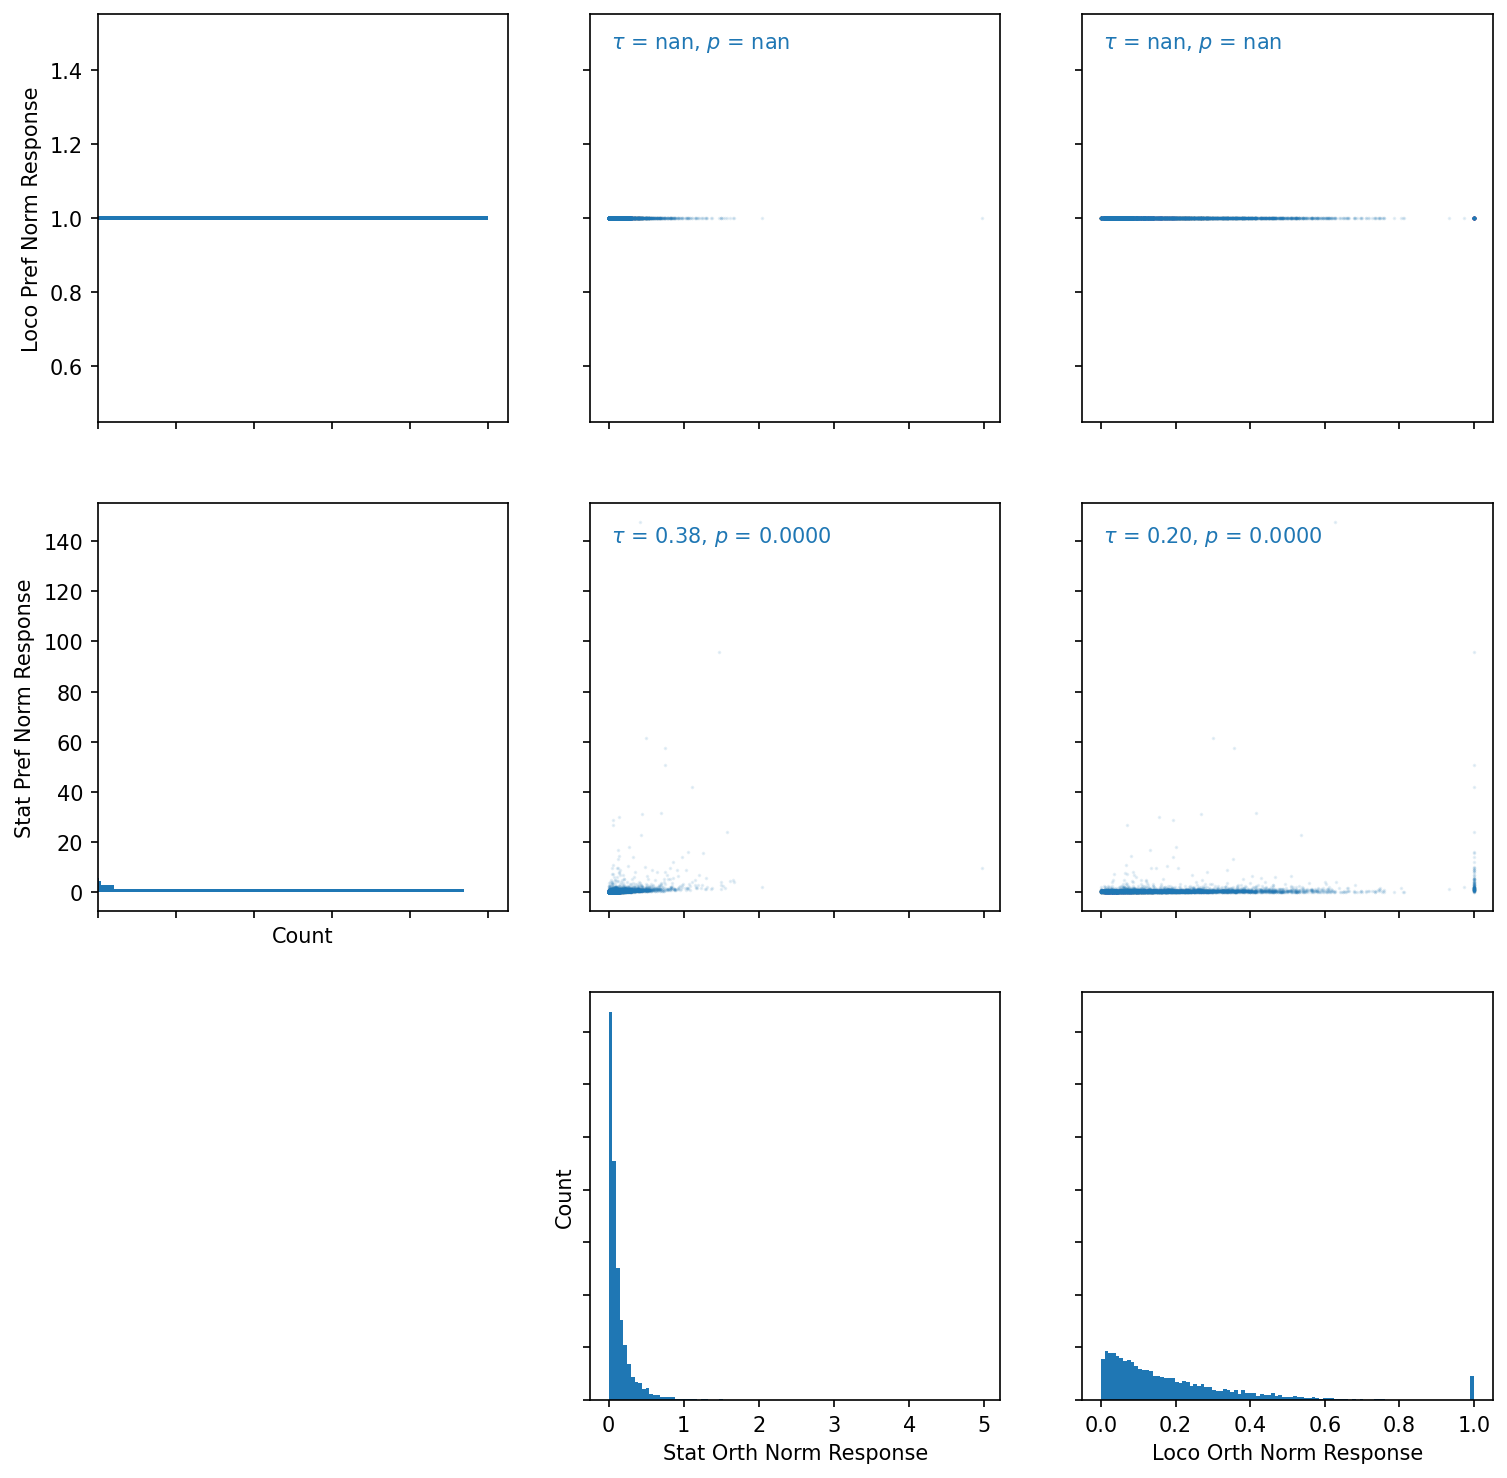

In [15]:
fig,axs=plt.subplots(3,3,figsize=(12,12),dpi=150,sharex='col',sharey='row')

axs[0,0].hist(resp_loco_pref/resp_loco_pref,101,orientation='horizontal')
axs[1,0].hist(resp_stat_pref/resp_loco_pref,101,orientation='horizontal')
axs[0,1].scatter(resp_stat_orth/resp_loco_pref,resp_loco_pref/resp_loco_pref,s=0.5,alpha=0.1)
axs[0,2].scatter(resp_loco_orth/resp_loco_pref,resp_loco_pref/resp_loco_pref,s=0.5,alpha=0.1)
axs[1,1].scatter(resp_stat_orth/resp_loco_pref,resp_stat_pref/resp_loco_pref,s=0.5,alpha=0.1)
axs[1,2].scatter(resp_loco_orth/resp_loco_pref,resp_stat_pref/resp_loco_pref,s=0.5,alpha=0.1)
axs[2,1].hist(resp_stat_orth/resp_loco_pref,101)
axs[2,2].hist(resp_loco_orth/resp_loco_pref,101)
axs[2,0].set_axis_off()

taustat = kendalltau(resp_stat_orth/resp_loco_pref,resp_loco_pref/resp_loco_pref)
axs[0,1].text(0.05,0.95,r'$\tau$ = {:.2f}, $p$ = {:.4f}'.format(taustat.statistic,taustat.pvalue),
              color='C0',ha='left',va='top',transform=axs[0,1].transAxes)
taustat = kendalltau(resp_loco_orth/resp_loco_pref,resp_loco_pref/resp_loco_pref)
axs[0,2].text(0.05,0.95,r'$\tau$ = {:.2f}, $p$ = {:.4f}'.format(taustat.statistic,taustat.pvalue),
              color='C0',ha='left',va='top',transform=axs[0,2].transAxes)
taustat = kendalltau(resp_stat_orth/resp_loco_pref,resp_stat_pref/resp_loco_pref)
axs[1,1].text(0.05,0.95,r'$\tau$ = {:.2f}, $p$ = {:.4f}'.format(taustat.statistic,taustat.pvalue),
              color='C0',ha='left',va='top',transform=axs[1,1].transAxes)
taustat = kendalltau(resp_loco_orth/resp_loco_pref,resp_stat_pref/resp_loco_pref)
axs[1,2].text(0.05,0.95,r'$\tau$ = {:.2f}, $p$ = {:.4f}'.format(taustat.statistic,taustat.pvalue),
              color='C0',ha='left',va='top',transform=axs[1,2].transAxes)

axs[0,0].set_ylabel('Loco Pref Norm Response')
axs[1,0].set_ylabel('Stat Pref Norm Response')
axs[2,1].set_xlabel('Stat Orth Norm Response')
axs[2,2].set_xlabel('Loco Orth Norm Response')
axs[1,0].set_xlabel('Count')
axs[2,1].set_ylabel('Count')